In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext dotenv
%dotenv

In [2]:
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from galaxies import plot_2Dmap, make_sample, detect_scan_from_filename,make_slice
import os
import glob

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [3]:
pixel_calibration = np.array([2.02640772e-01, 2.44374424e+03])
roi_left = [70, 100]
roi_right = [285, 315]

# Folder overview

In [43]:
def foo():

    files = sorted(glob.glob(os.path.join(os.environ['DATA_PATH'], 'Electrode*.nxs')))
    # filter for file numbers 21 and above
    files = [f for f in files if int(os.path.basename(f).split('_')[1]) < 21]

    data = []
    for filename in files:
        scan_type, scan_command, all_data = detect_scan_from_filename(filename, include_full_data=True)
        time_start = all_data.get('start_time', None)
        sample_zs = all_data.get('sample_zs', None)
        number_of_energies = len(all_data.get('energies', []))
        number_of_images = len(all_data.get('images', []))
        exposure_time = all_data.get('exposure_time', [0])[0]/1000  # Convert from ms to seconds

        data.append((time_start, os.path.basename(filename), scan_type, number_of_energies, number_of_images, exposure_time, sample_zs, scan_command))
    df = pd.DataFrame(data, columns=['start_time', 'filename', 'scan_type', 'ene_steps', 'frames', 'seconds_per_step', 'sample Z', 'scan_command'])
    return df.sort_values(by='start_time', ascending=False)

foo()

start_time               filename     scan_type  ene_steps  \
184  2025-05-30T16:49:51  Electrode_20_0009.nxs      XAS scan          0   
183  2025-05-30T16:48:46  Electrode_20_0008.nxs      XAS scan          0   
182  2025-05-30T16:20:00  Electrode_20_0007.nxs     RIXS scan          0   
181  2025-05-30T16:13:27  Electrode_20_0006.nxs  XES one shot          0   
180  2025-05-30T16:11:55  Electrode_20_0005.nxs  XES one shot          0   
..                   ...                    ...           ...        ...   
2    2025-05-28T17:53:19  Electrode_01_0003.nxs     RIXS scan          0   
1    2025-05-28T17:35:09  Electrode_01_0002.nxs     RIXS scan          5   
0    2025-05-28T17:23:31  Electrode_01_0001.nxs  XES one shot          1   
29                  None  Electrode_04_0001.nxs  XES one shot          0   
30                  None  Electrode_04_0002.nxs  XES one shot          0   

     frames  seconds_per_step          sample Z  \
184       0              10.0  [-43.9999997525]   
183       0              10.0  [-43.9999997525]   
182      84              10.0   [-43.999899745]   
181       1              60.0   [-43.999899745]   
180       1              60.0   [-43.999899745]   
..      ...               ...               ...   
2         5               1.0     [-41.9991497]   
1         5               0.0   [-41.999349715]   
0         1               0.0  [-41.9992497075]   
29        1               0.0              None   
30        1               0.0              None   

                              scan_command  
184  a_stepscan bl_energy 2465 2490 125 1   
183                                         
182                                         
181                                         
180                                         
..                                     ...  
2                                           
1                                           
0                                           
29                                          
30                                          

[185 rows x 8 columns]

# Electrode 01

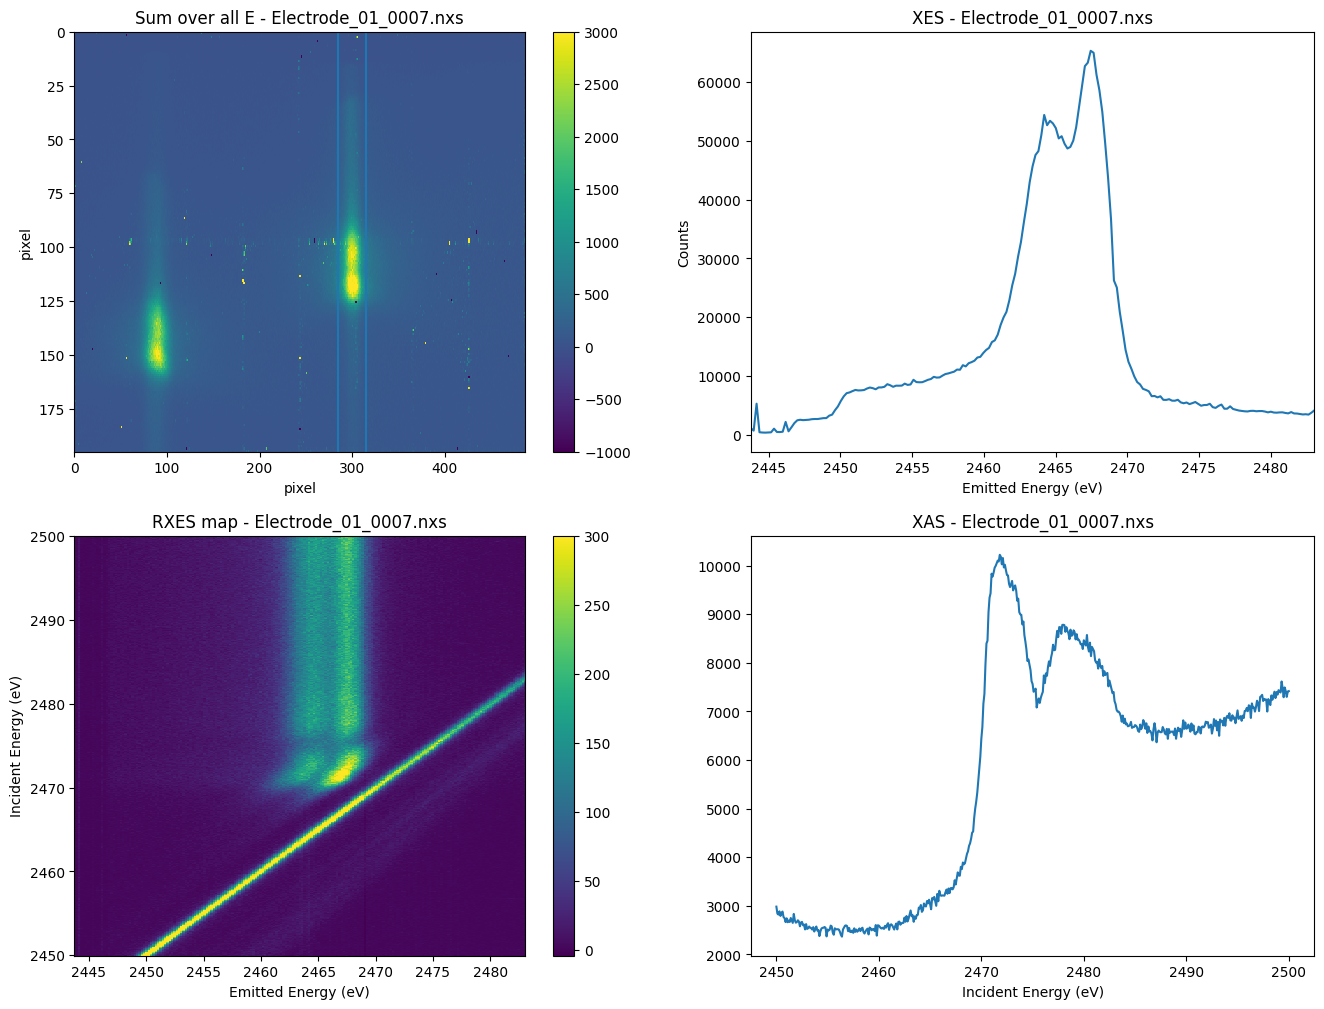

In [107]:
plot_2Dmap('Electrode_01_0007.nxs', pixel_calibration, roi_right, vmax_sum=3000, vmax_rxes=300)

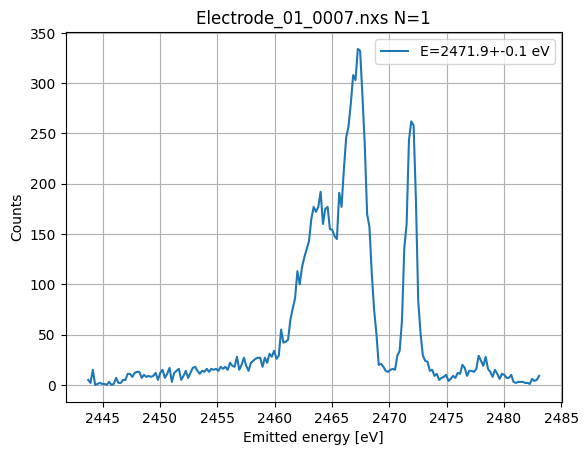

In [46]:
_ = make_slice('Electrode_01_0007.nxs', roi_right, pixel_calibration, 2471.9)

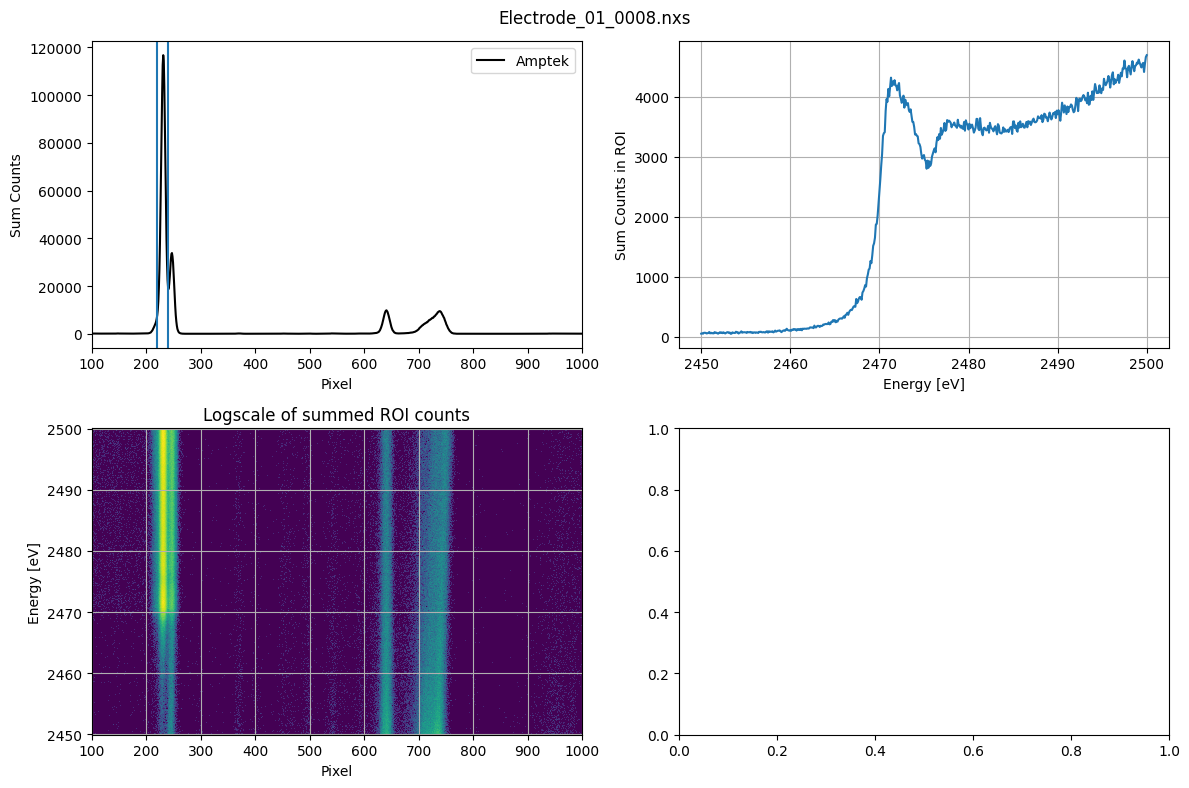

In [47]:
make_sample('Electrode_01_0008.nxs', [[220,240]])

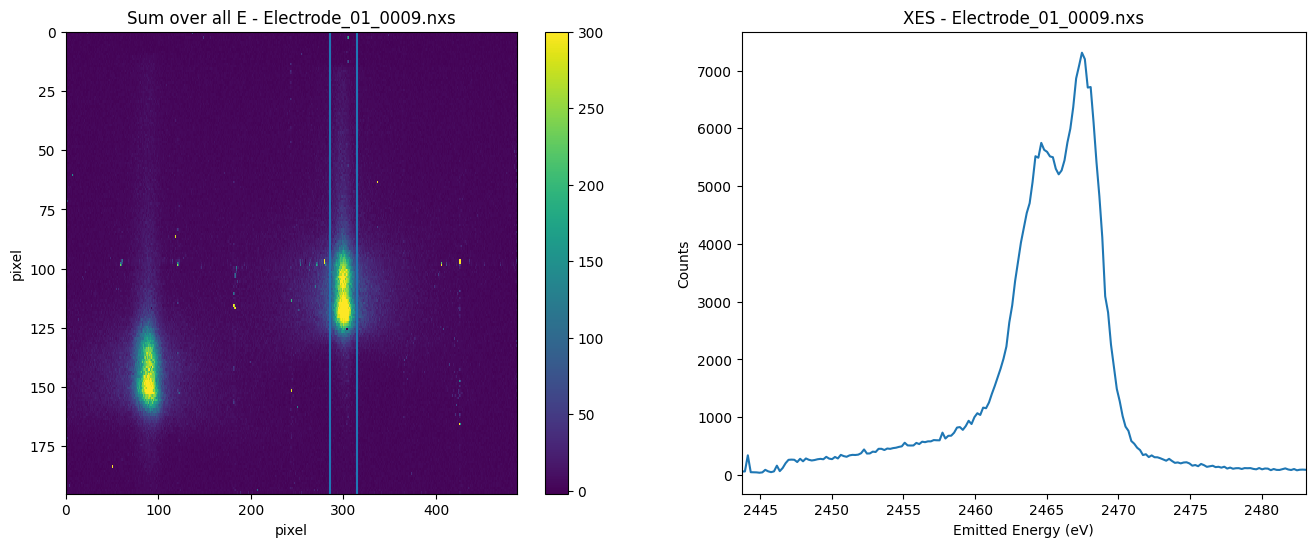

In [51]:
plot_2Dmap('Electrode_01_0009.nxs', pixel_calibration, roi_right, vmax_sum=300)

# Electrode 02

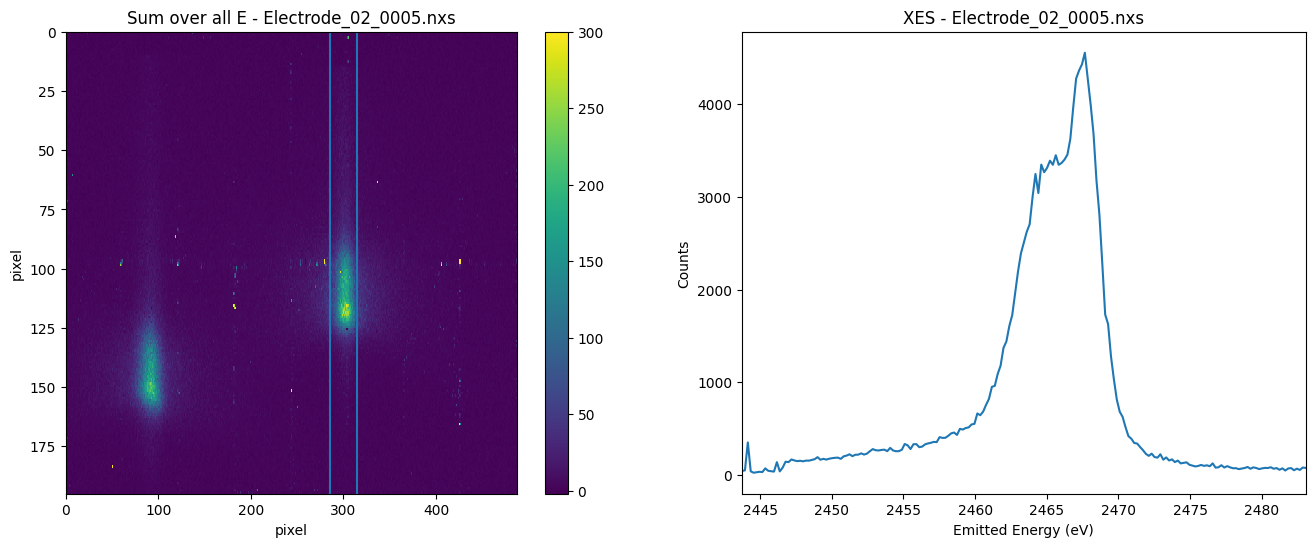

In [52]:
plot_2Dmap('Electrode_02_0005.nxs', pixel_calibration, roi_right, vmax_sum=300)

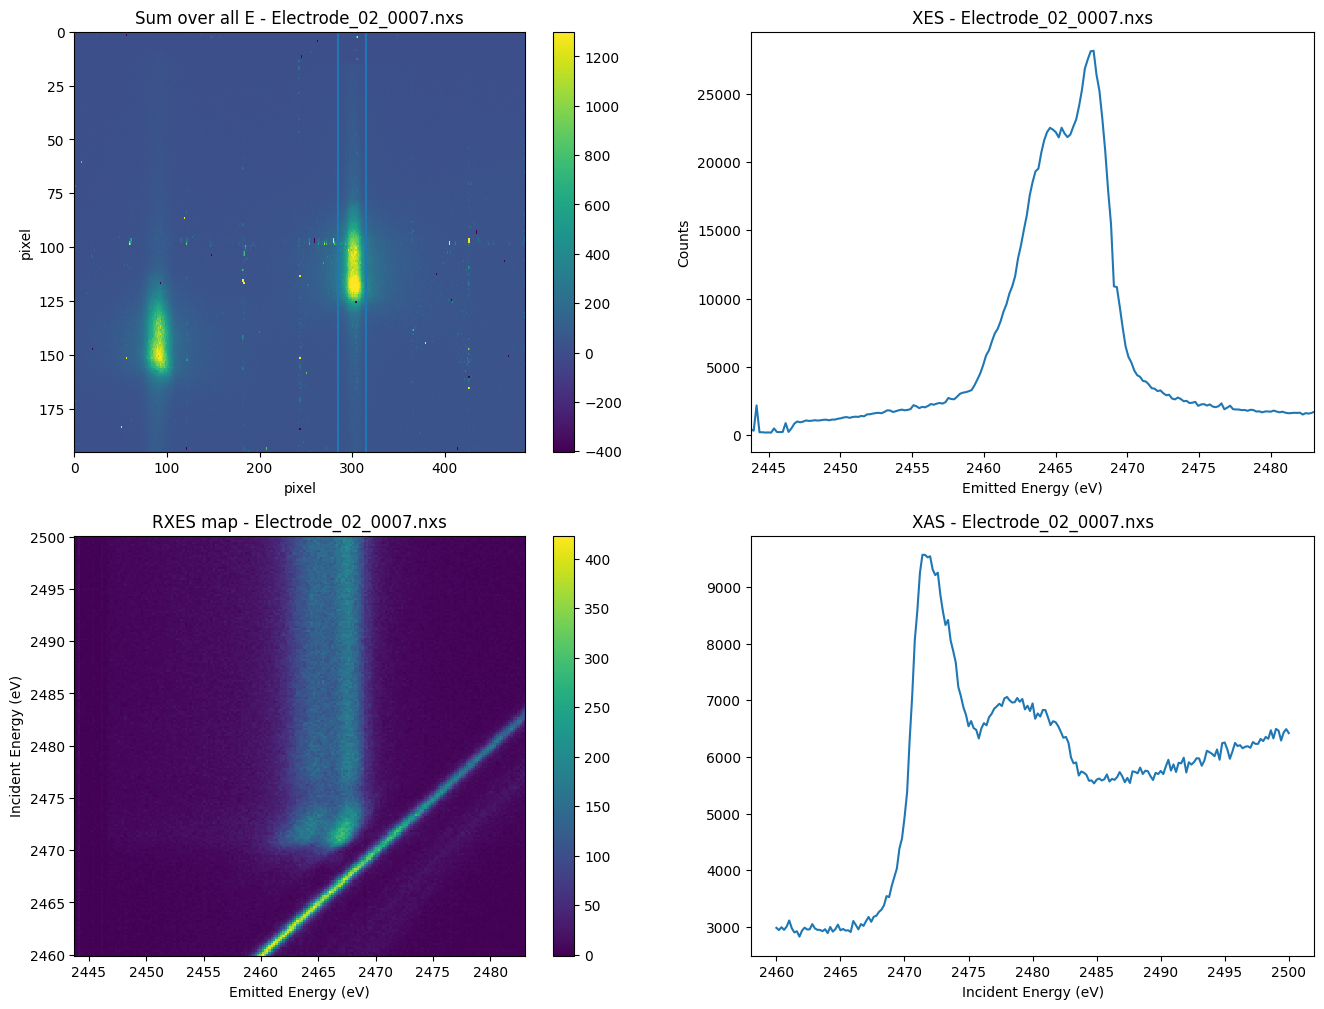

In [53]:
plot_2Dmap('Electrode_02_0007.nxs', pixel_calibration, roi_right, vmax_sum=1300)

# Electrode 04

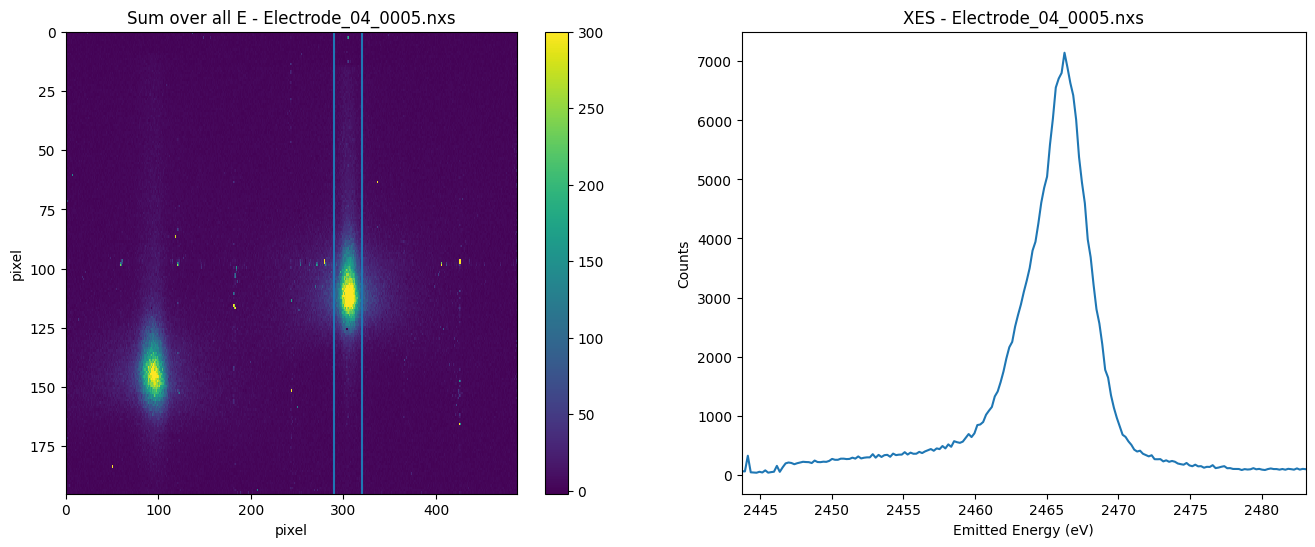

In [56]:
plot_2Dmap('Electrode_04_0005.nxs', pixel_calibration, [290, 320], vmax_sum=300)

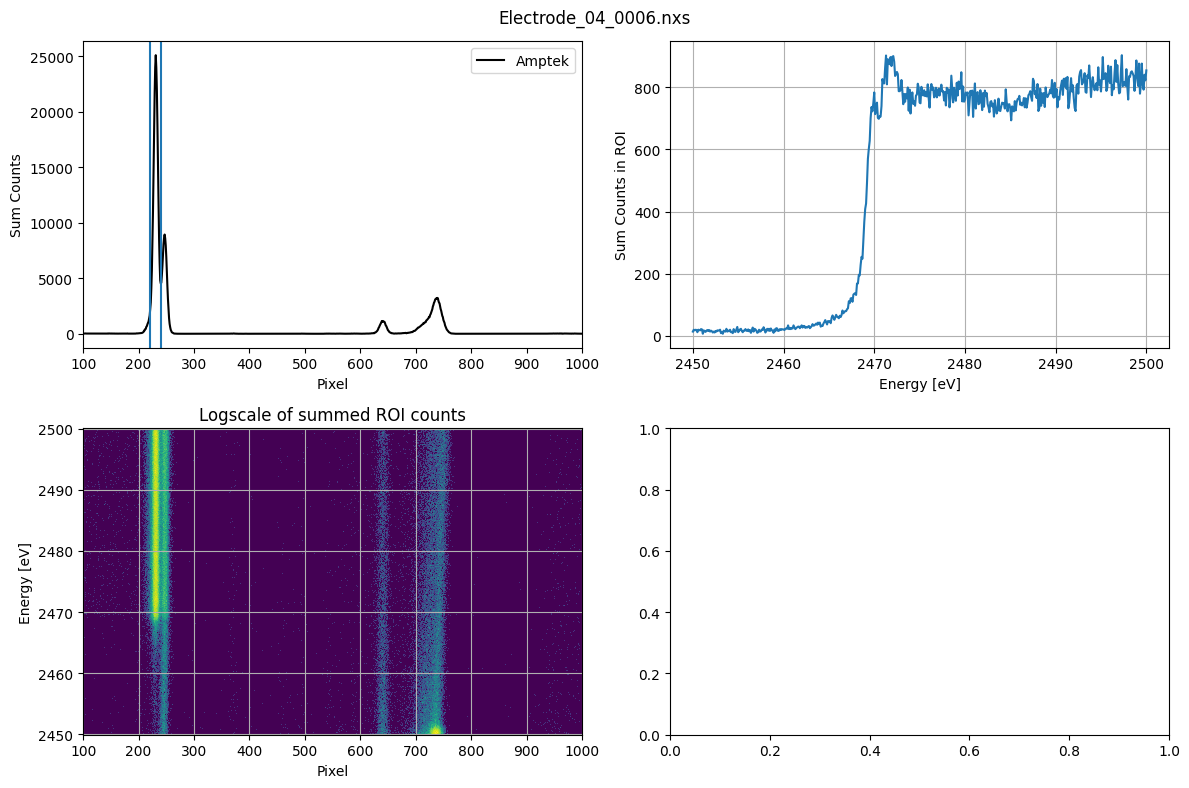

In [57]:
make_sample('Electrode_04_0006.nxs', [[220,240]])

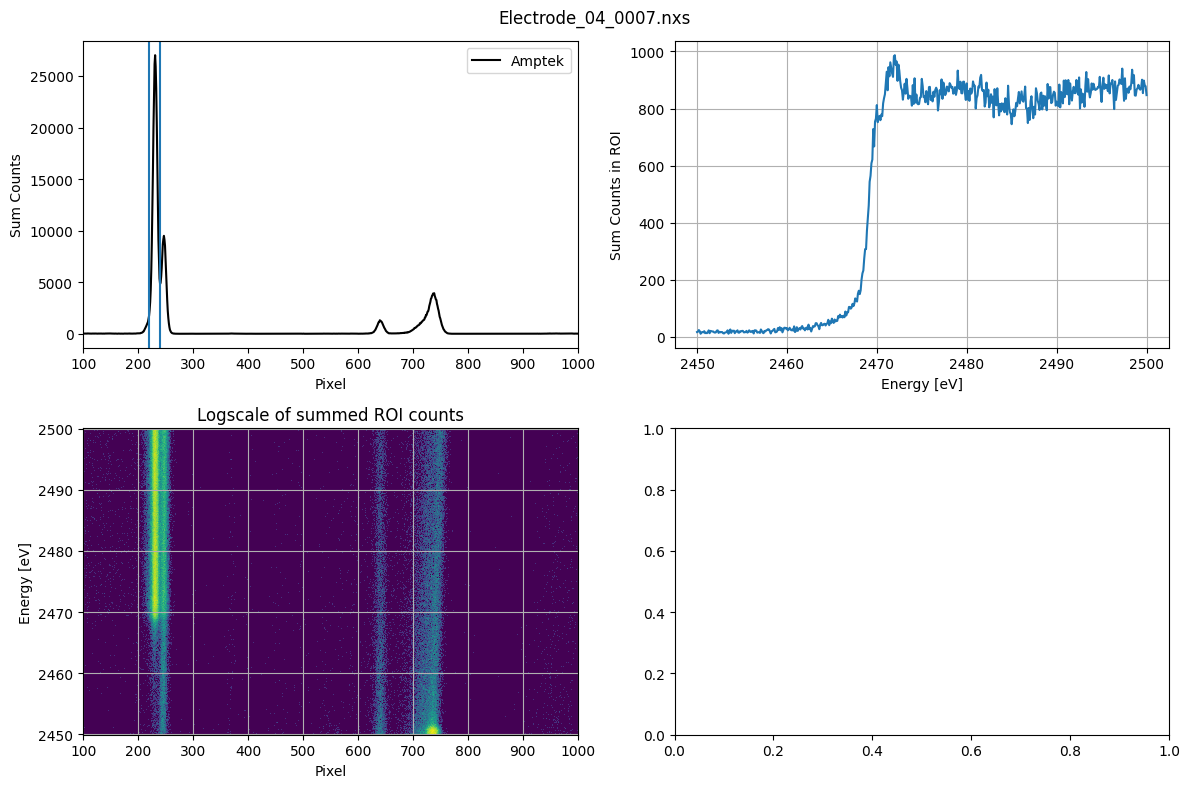

In [58]:
make_sample('Electrode_04_0007.nxs', [[220,240]])

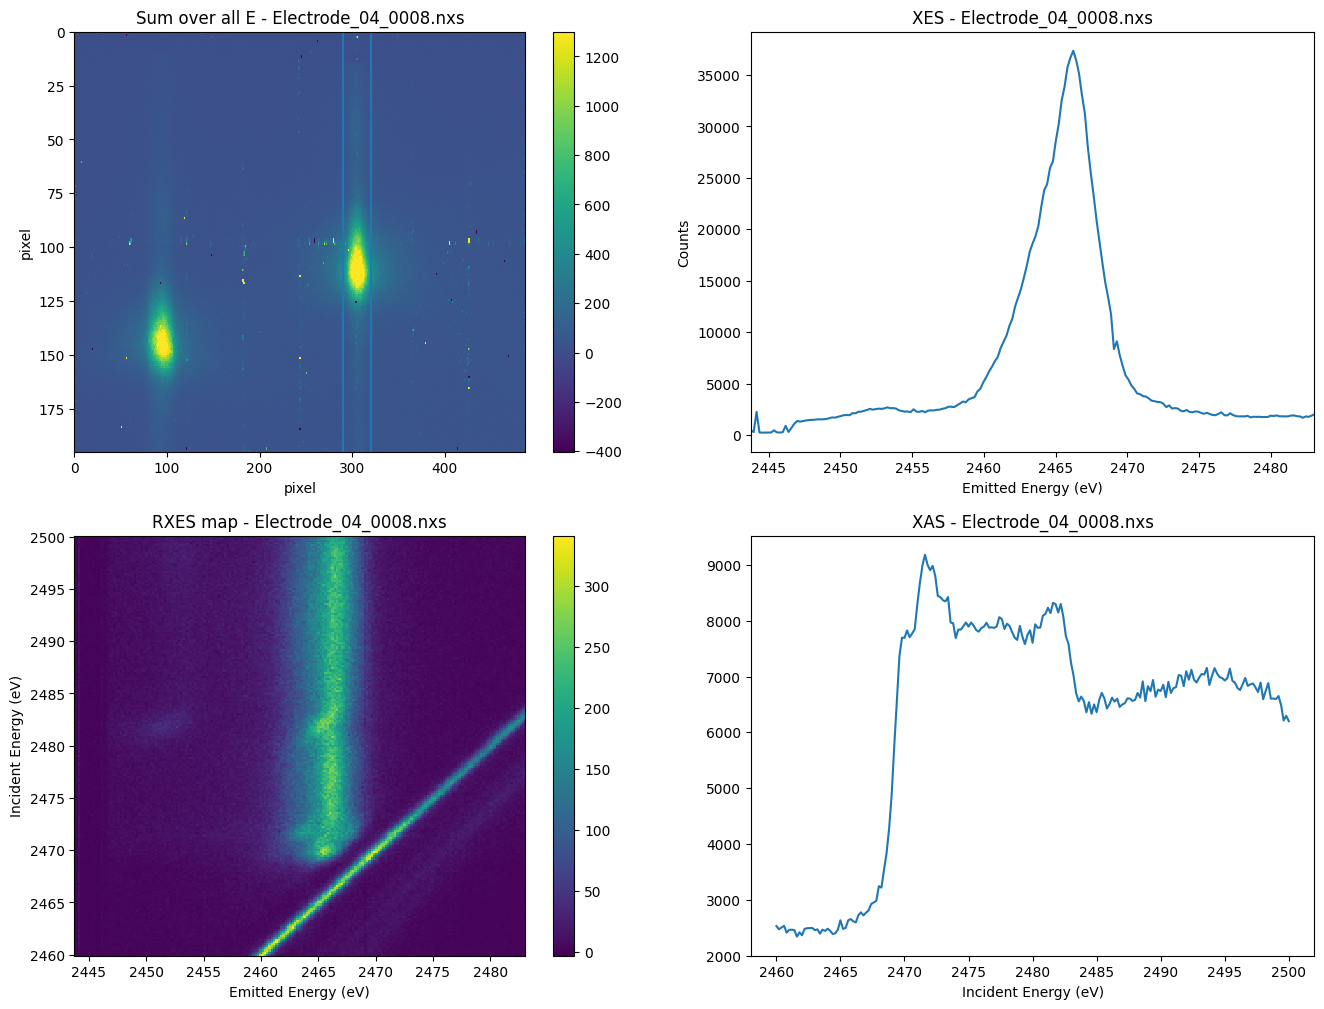

In [59]:
plot_2Dmap('Electrode_04_0008.nxs', pixel_calibration, [290, 320], vmax_sum=1300)

# Electrode 05

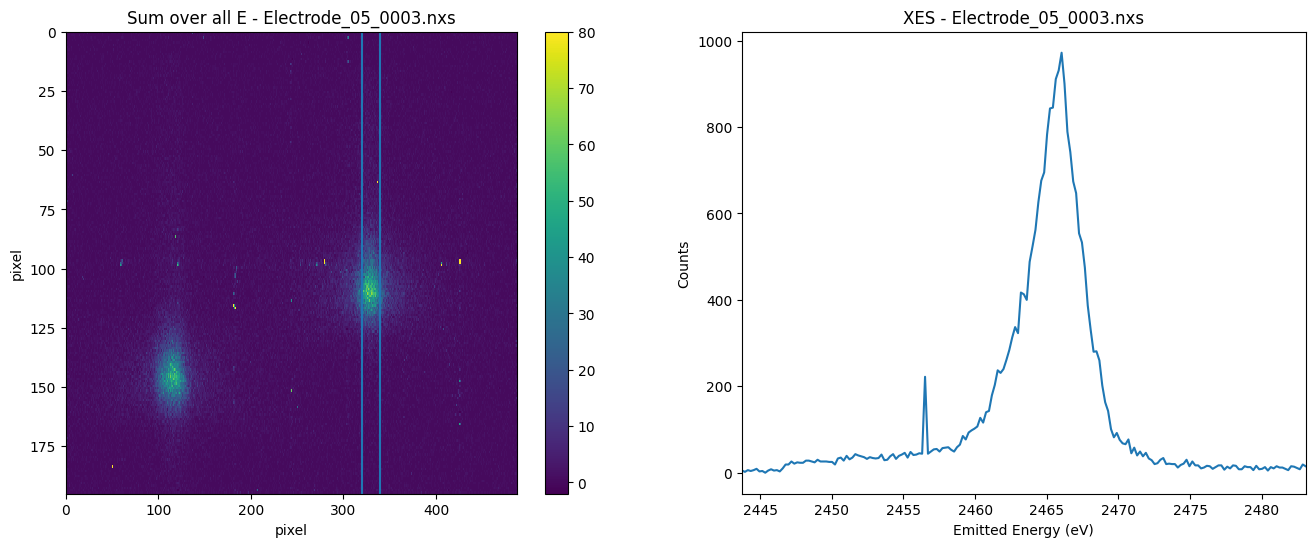

In [60]:
plot_2Dmap('Electrode_05_0003.nxs', pixel_calibration, [320, 340], vmax_sum=80)

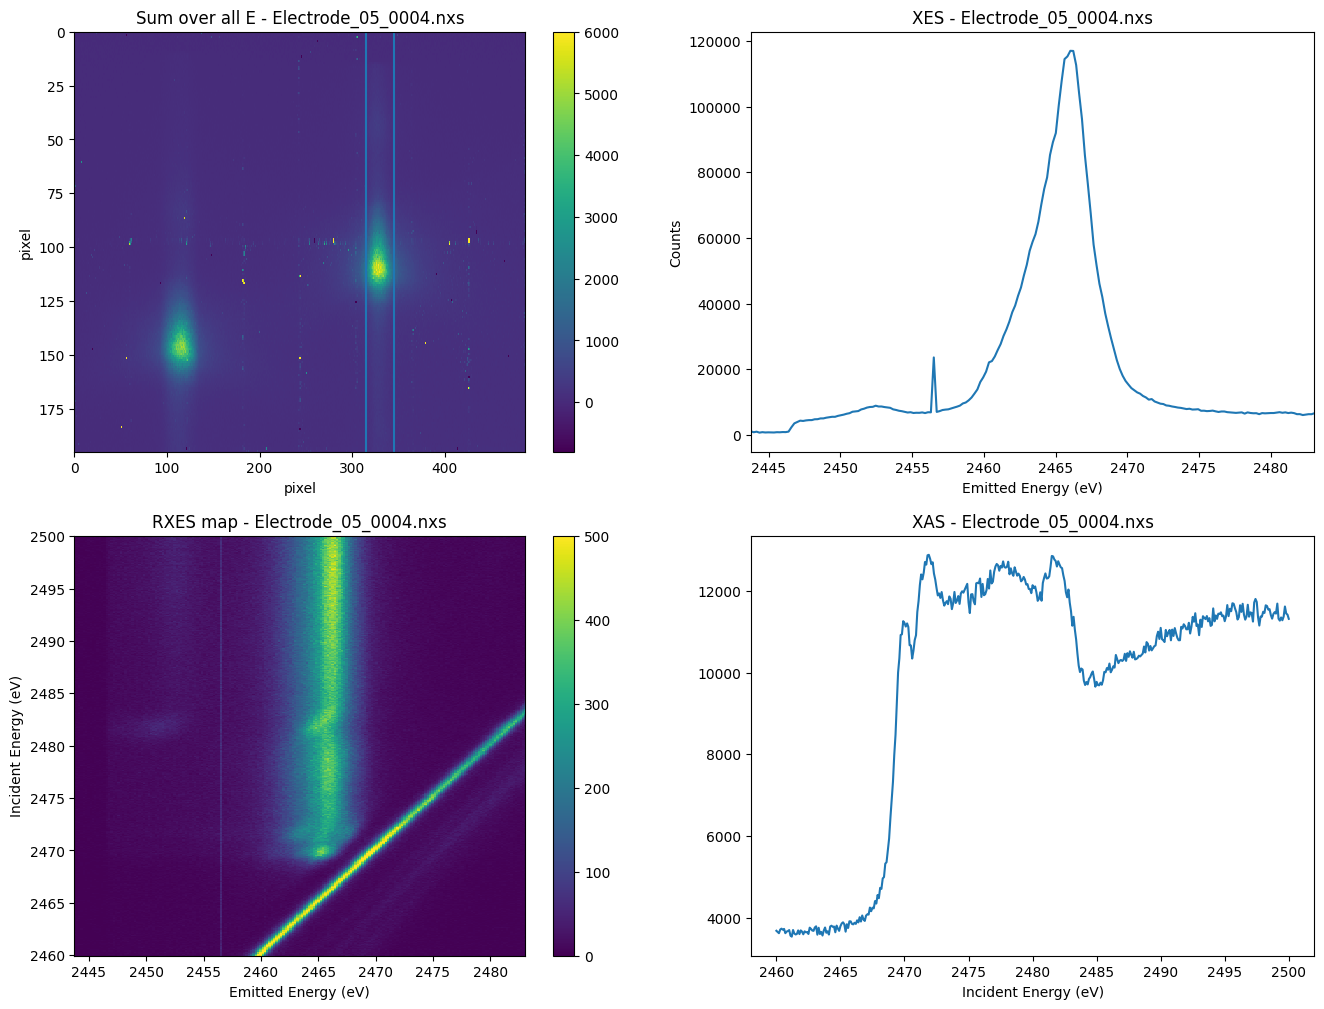

In [105]:
plot_2Dmap('Electrode_05_0004.nxs', pixel_calibration, [315, 345], vmax_sum=6000, vmax_rxes=500)

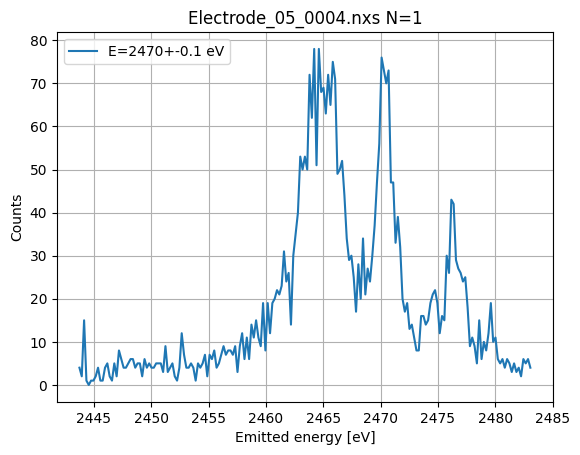

In [40]:
_ = make_slice('Electrode_05_0004.nxs', roi_right, pixel_calibration, 2470)

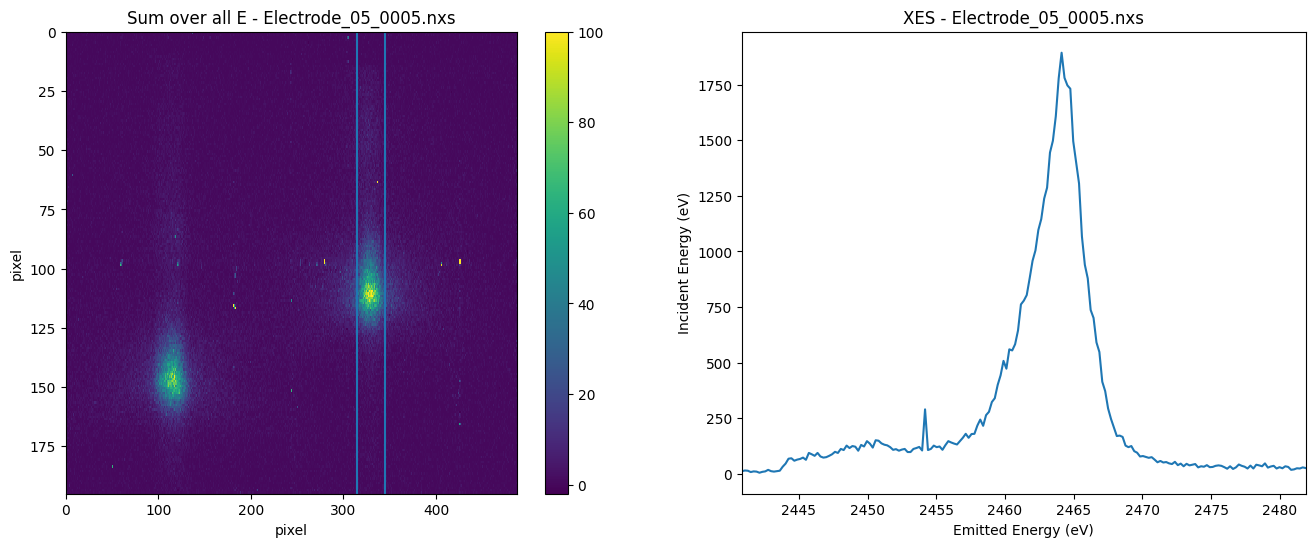

In [33]:
plot_2Dmap('Electrode_05_0005.nxs', pixel_calibration, [315, 345], vmax_sum=100)

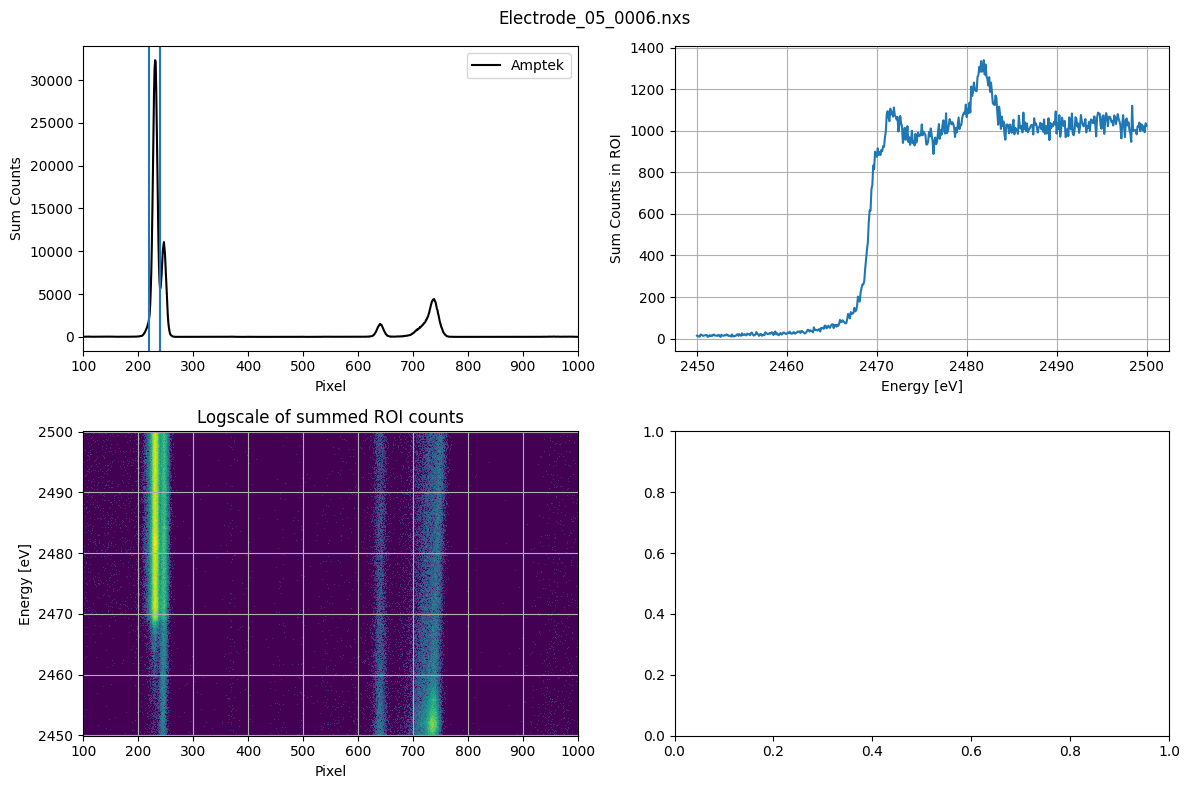

In [62]:
make_sample('Electrode_05_0006.nxs', [[220,240]])

# Electrode 06

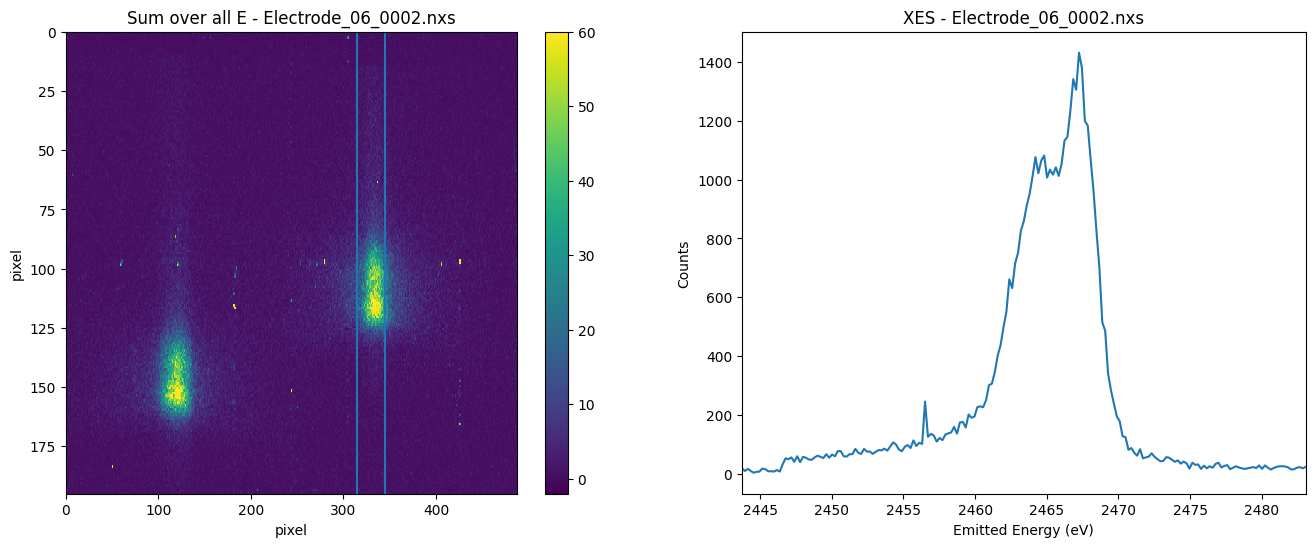

In [66]:
plot_2Dmap('Electrode_06_0002.nxs', pixel_calibration, [315, 345], vmax_sum=60)

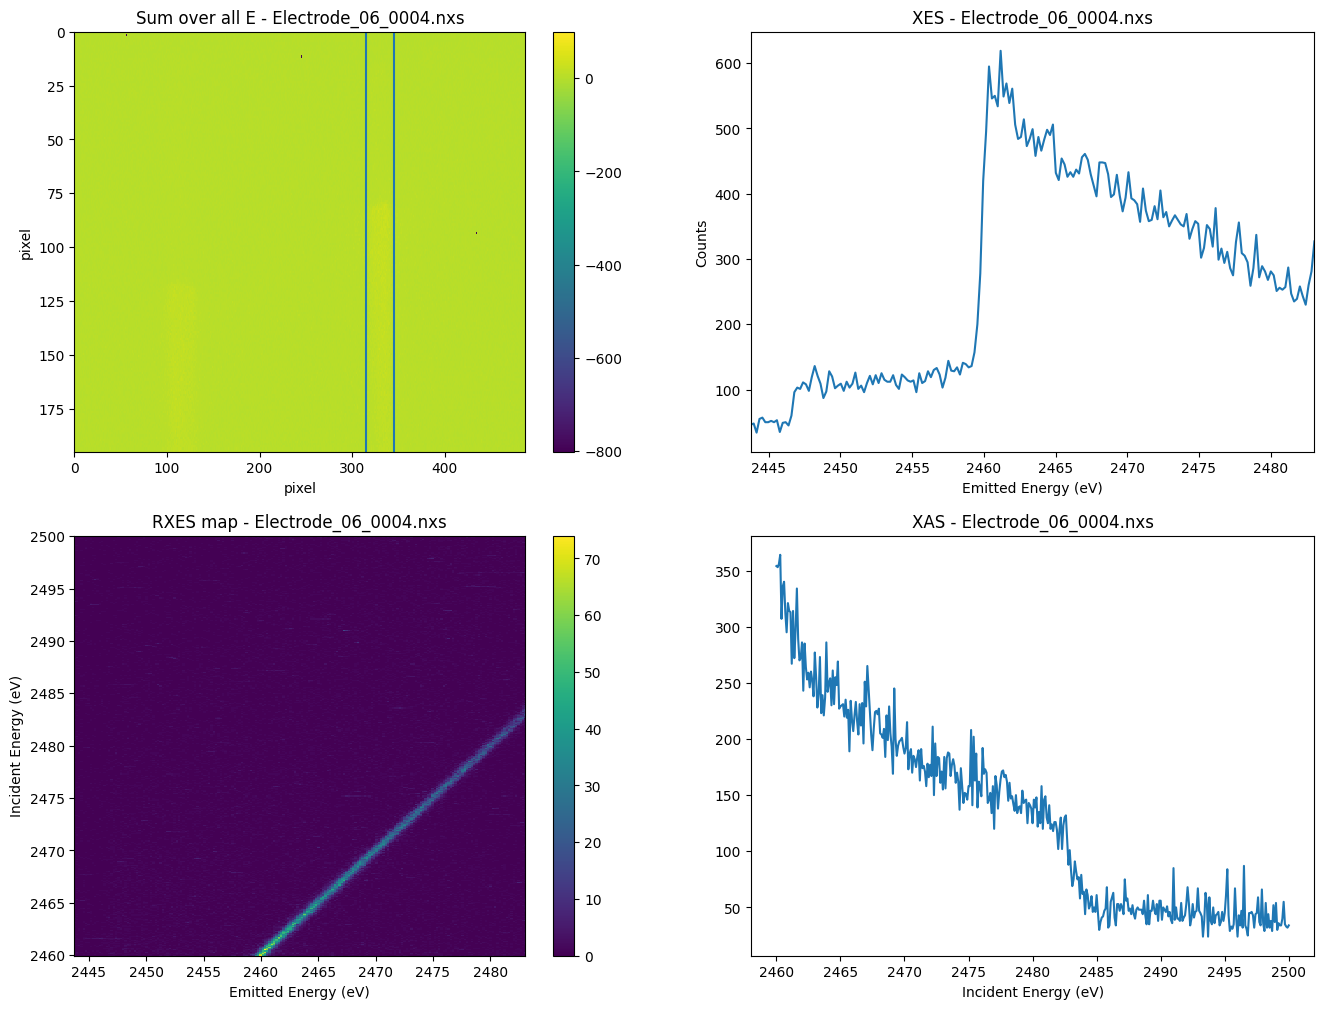

In [81]:
plot_2Dmap('Electrode_06_0004.nxs', pixel_calibration, [315, 345], vmax_sum=100)

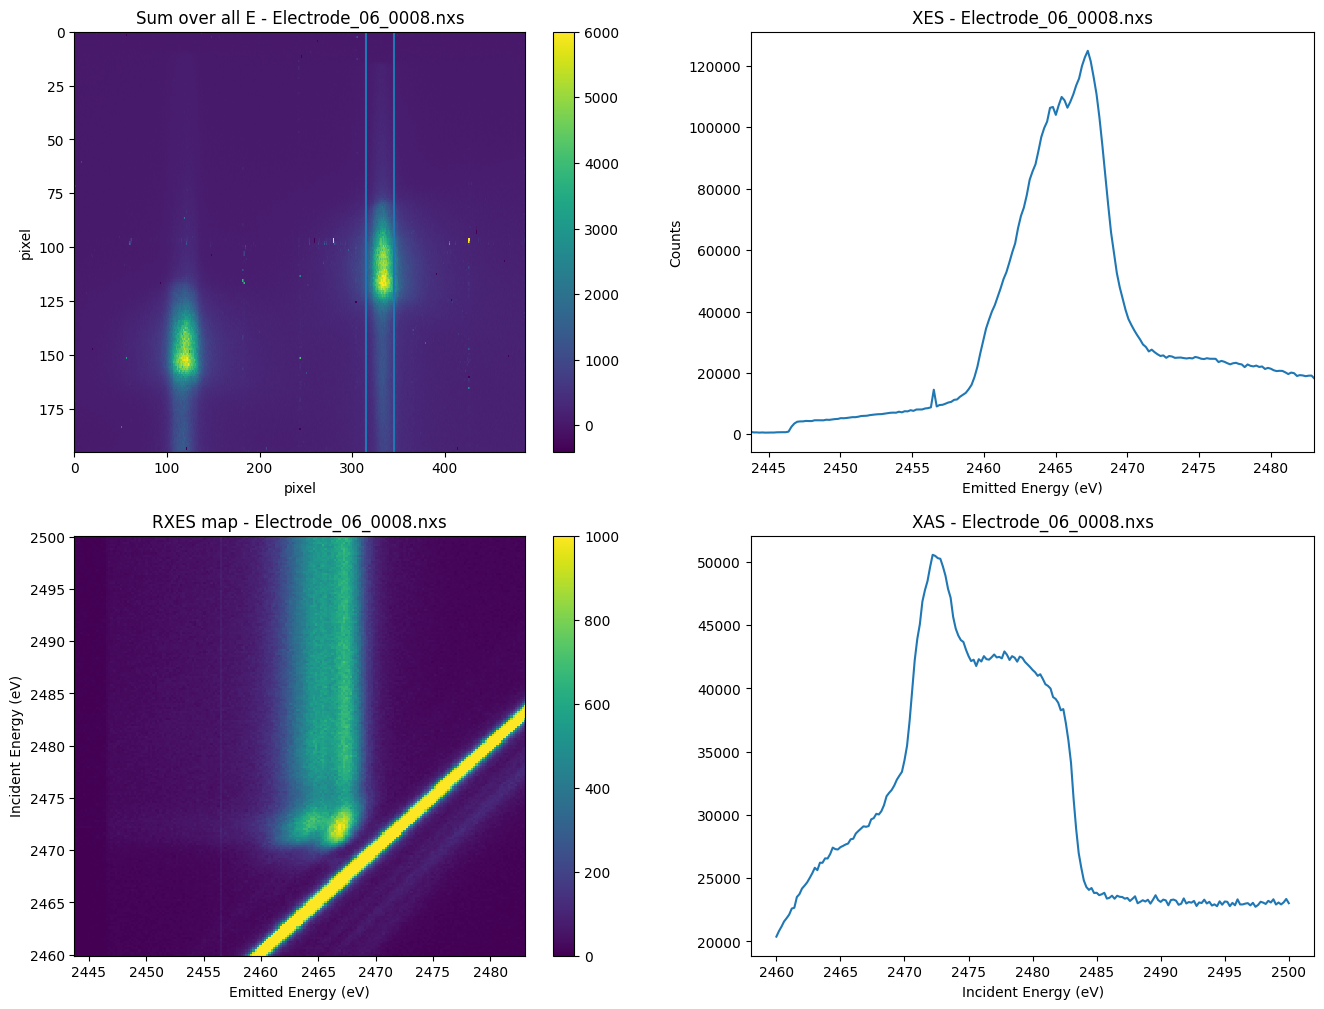

In [102]:
plot_2Dmap('Electrode_06_0008.nxs', pixel_calibration, [315, 345], vmax_sum=6000, vmax_rxes=1000,
           replace={'energies': np.arange(2460, 2500.1, 0.2)})

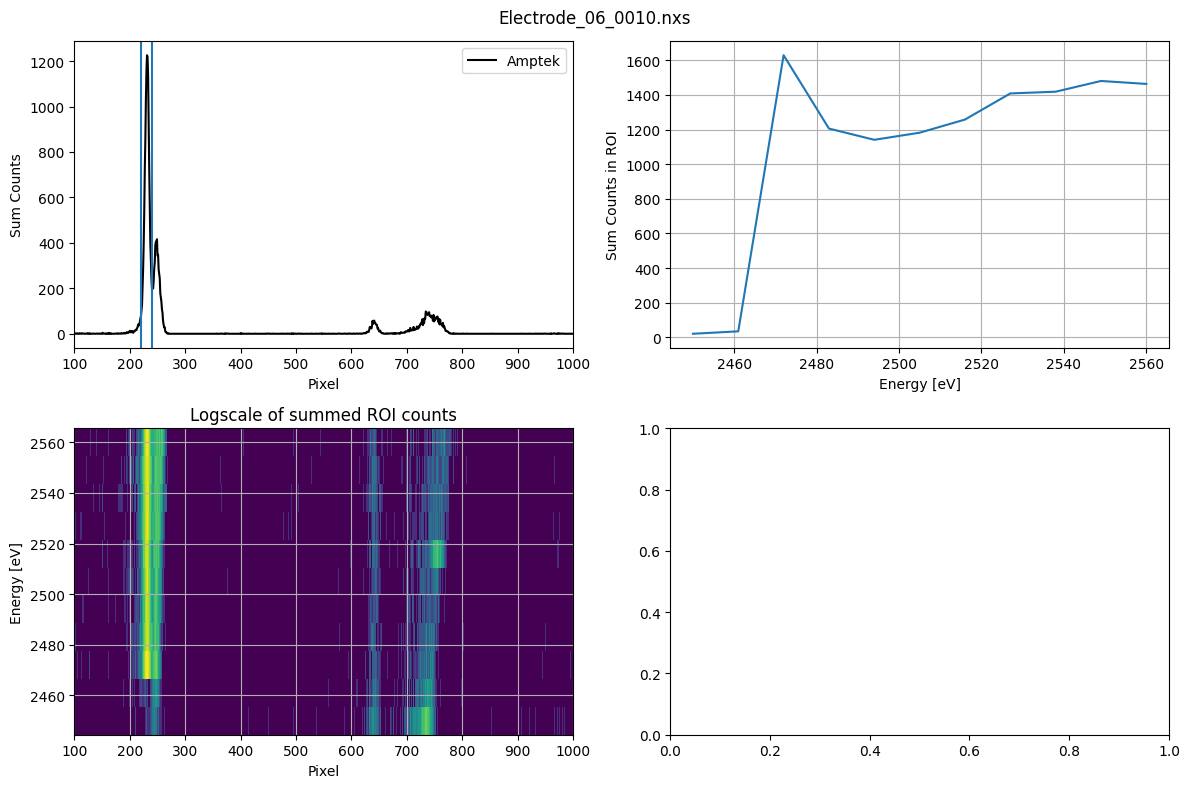

In [82]:
make_sample('Electrode_06_0010.nxs', [[220,240]])

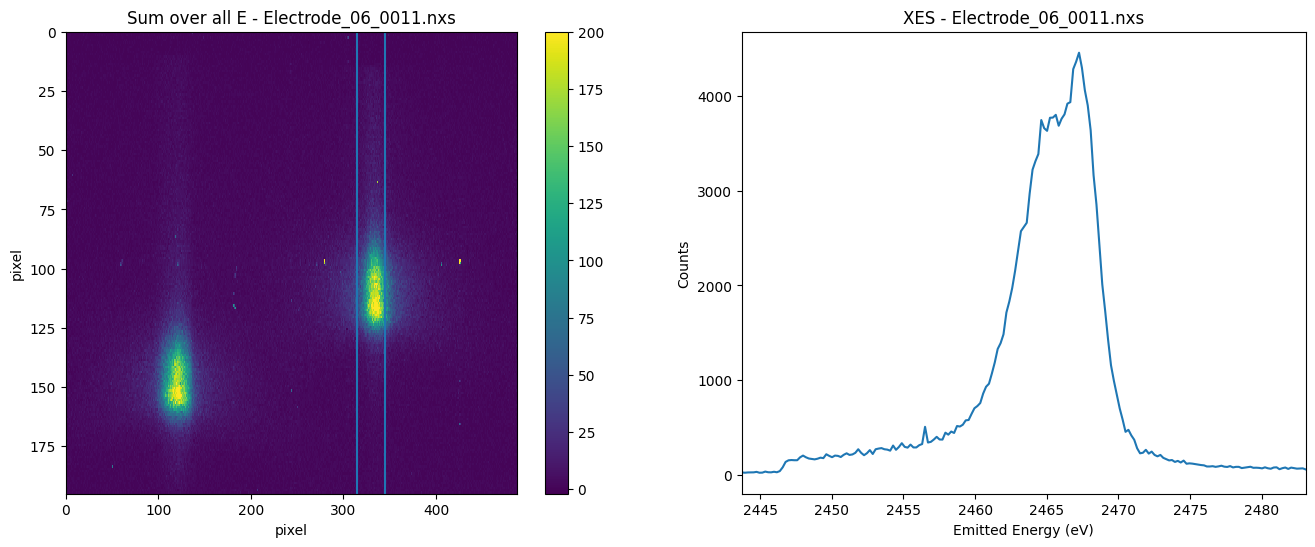

In [87]:
plot_2Dmap('Electrode_06_0011.nxs', pixel_calibration, [315, 345], vmax_sum=200)

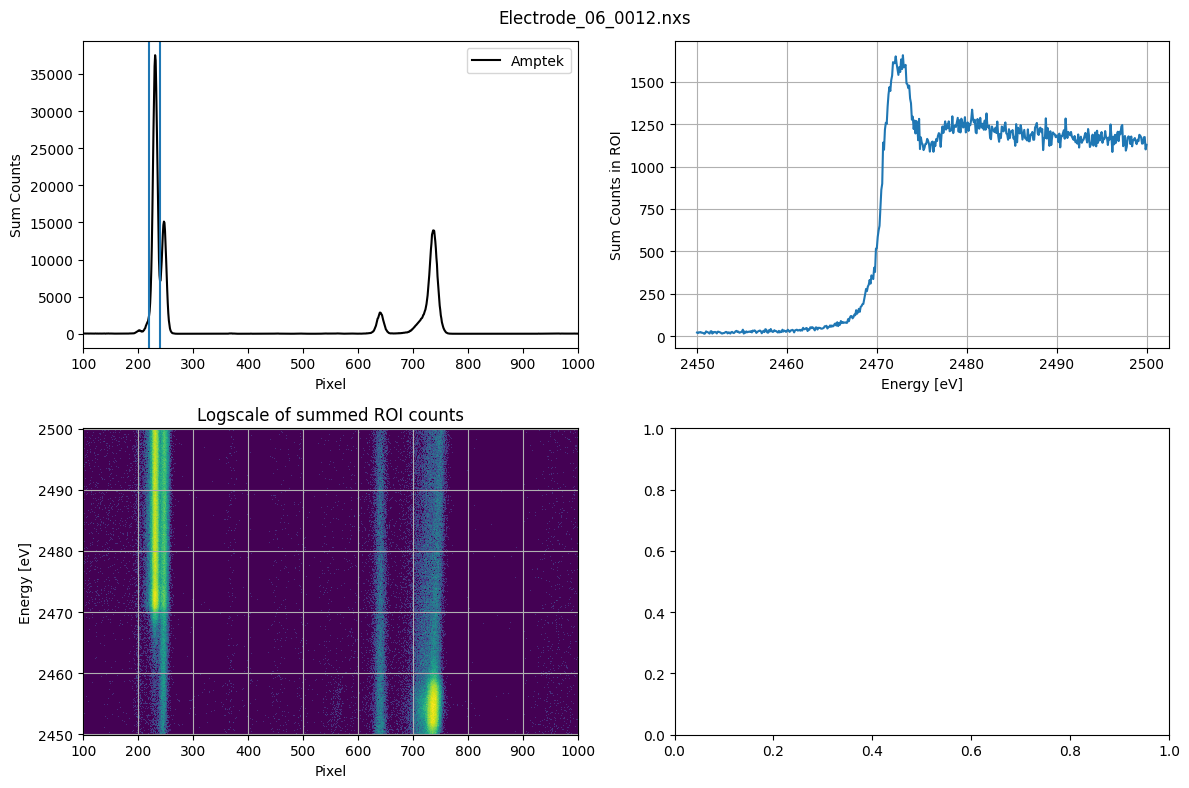

In [88]:
make_sample('Electrode_06_0012.nxs', [[220,240]])

# Electrode 07

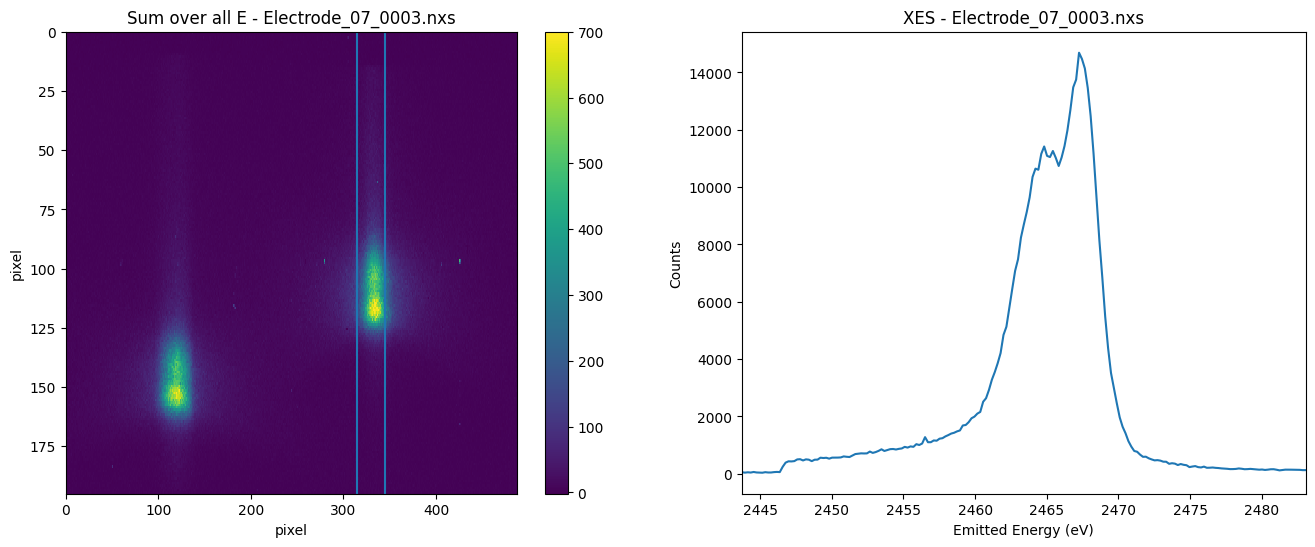

In [93]:
plot_2Dmap('Electrode_07_0003.nxs', pixel_calibration, [315, 345], vmax_sum=700)

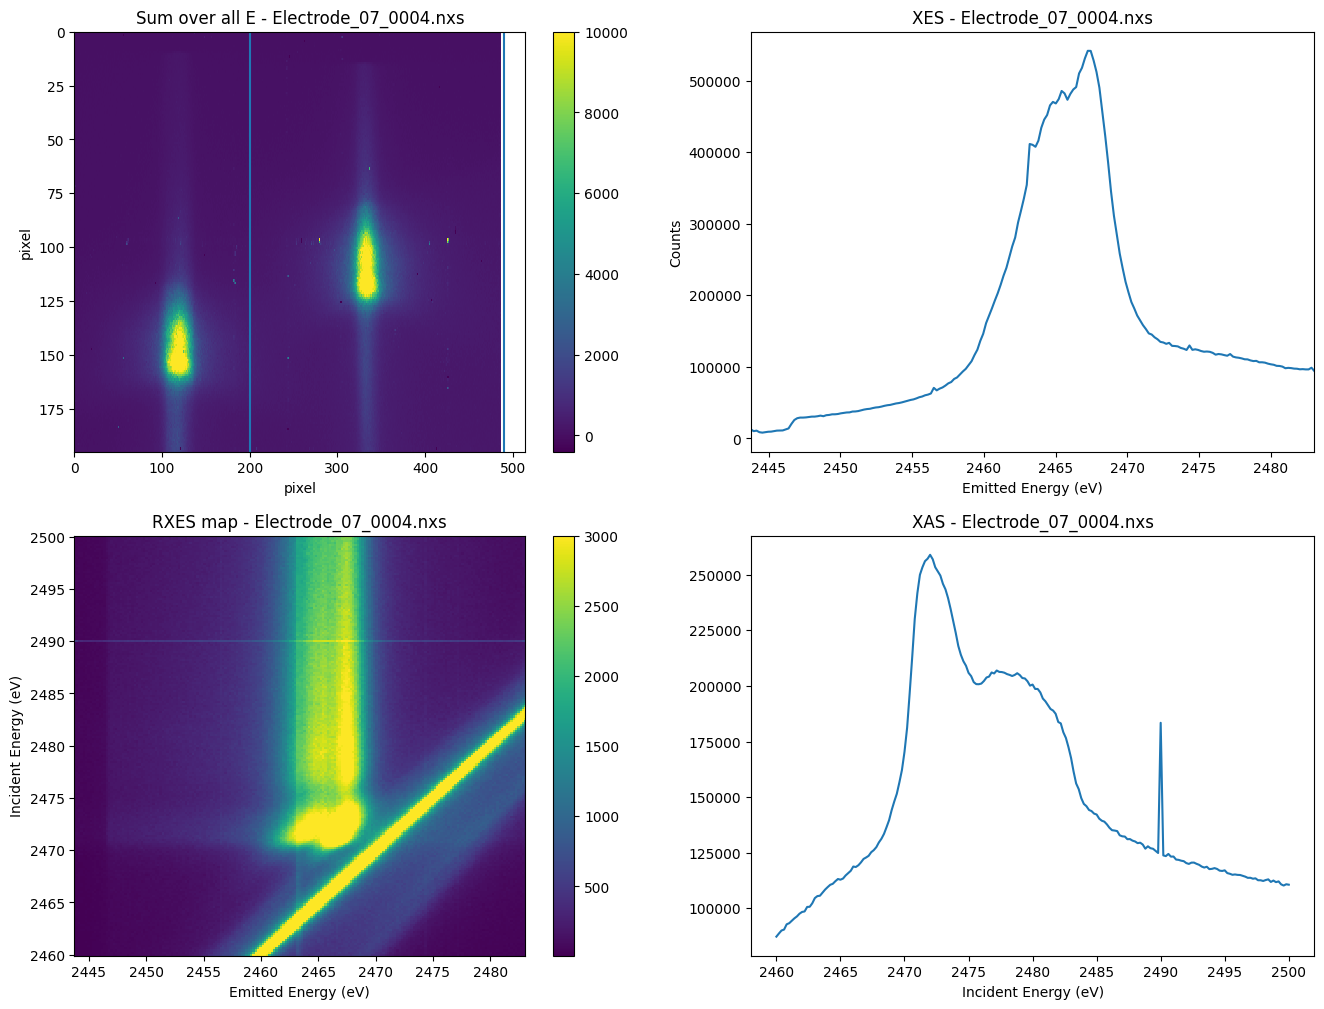

In [132]:
plot_2Dmap('Electrode_07_0004.nxs', pixel_calibration, [200, 490], vmax_sum=10000, vmax_rxes=3000)

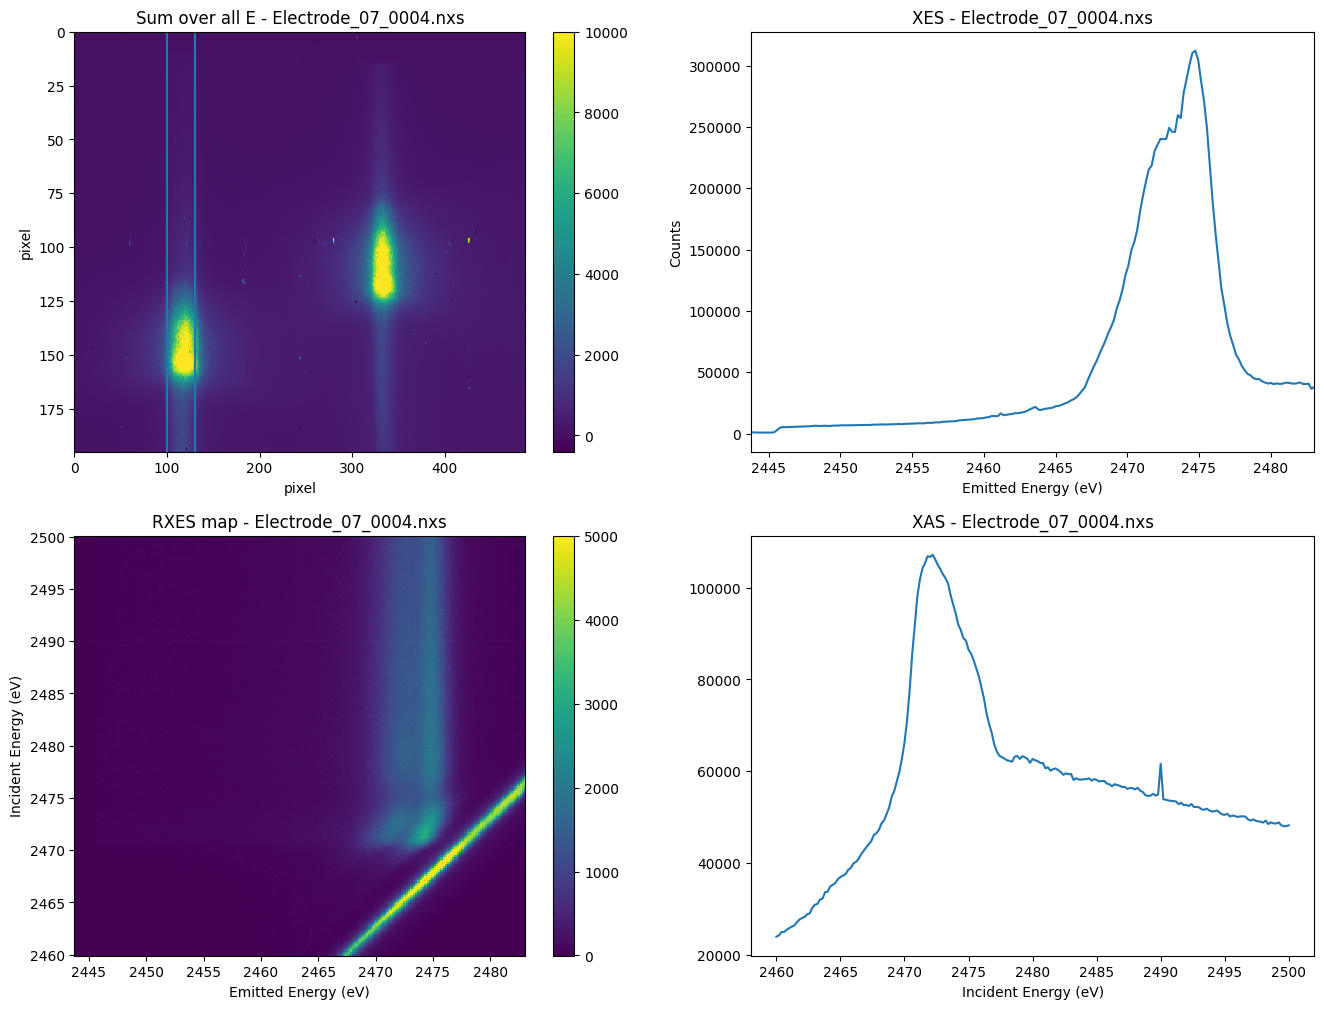

In [127]:
# plot_2Dmap('Electrode_07_0004.nxs', pixel_calibration, [117, 120], vmax_sum=10000, vmax_rxes=500)
plot_2Dmap('Electrode_07_0004.nxs', pixel_calibration, [100, 130], vmax_sum=10000, vmax_rxes=5000)

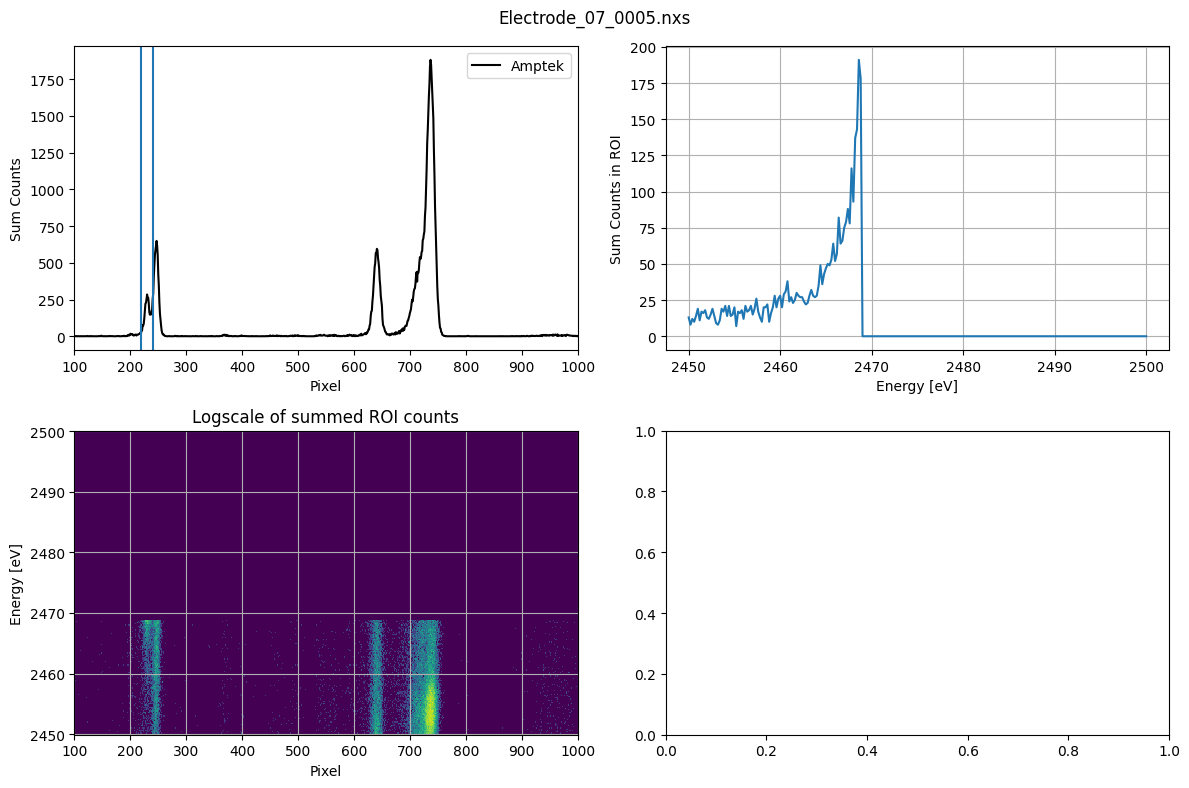

In [108]:
make_sample('Electrode_07_0005.nxs', [[220,240]])

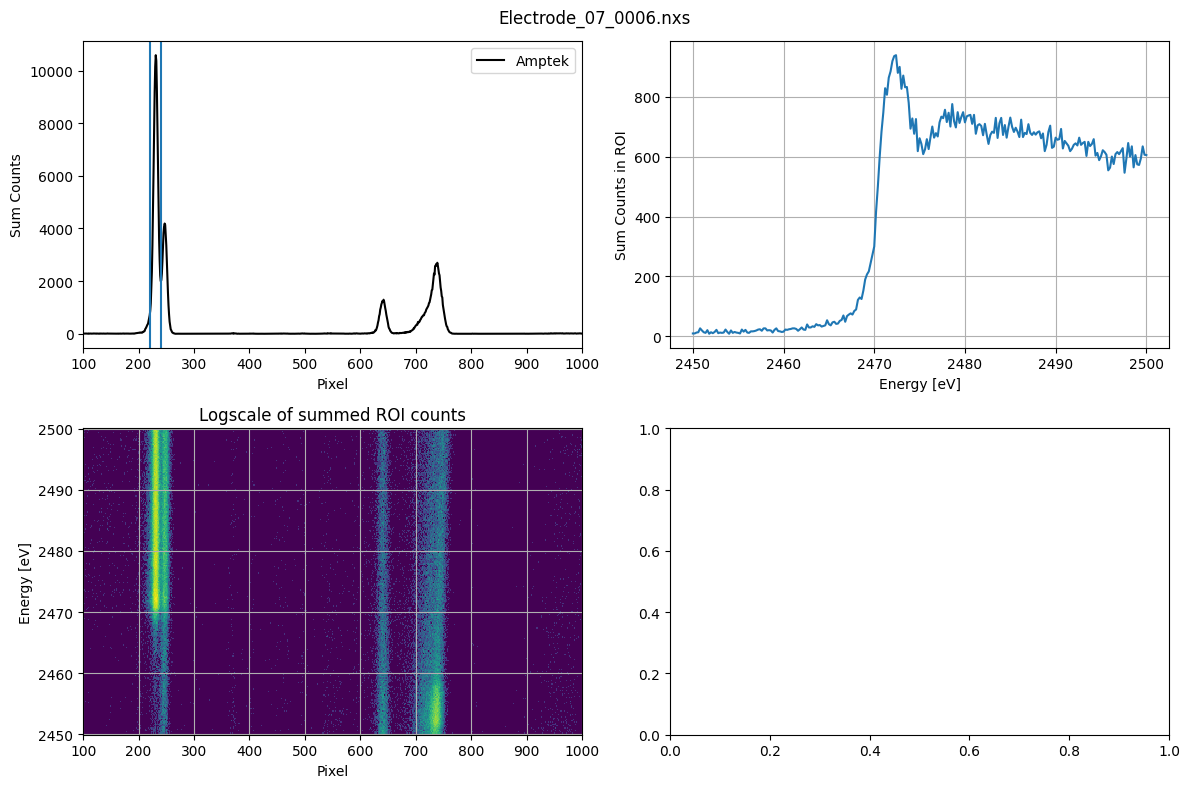

In [109]:
make_sample('Electrode_07_0006.nxs', [[220,240]])

# Electrode 08

# Electrode 09

# Electrode 10

# Electrode 11

# Electrode 12

# Electrode 13

# Electrode 14

# Electrode 15

# Electrode 16

# Electrode 17

# Electrode 18

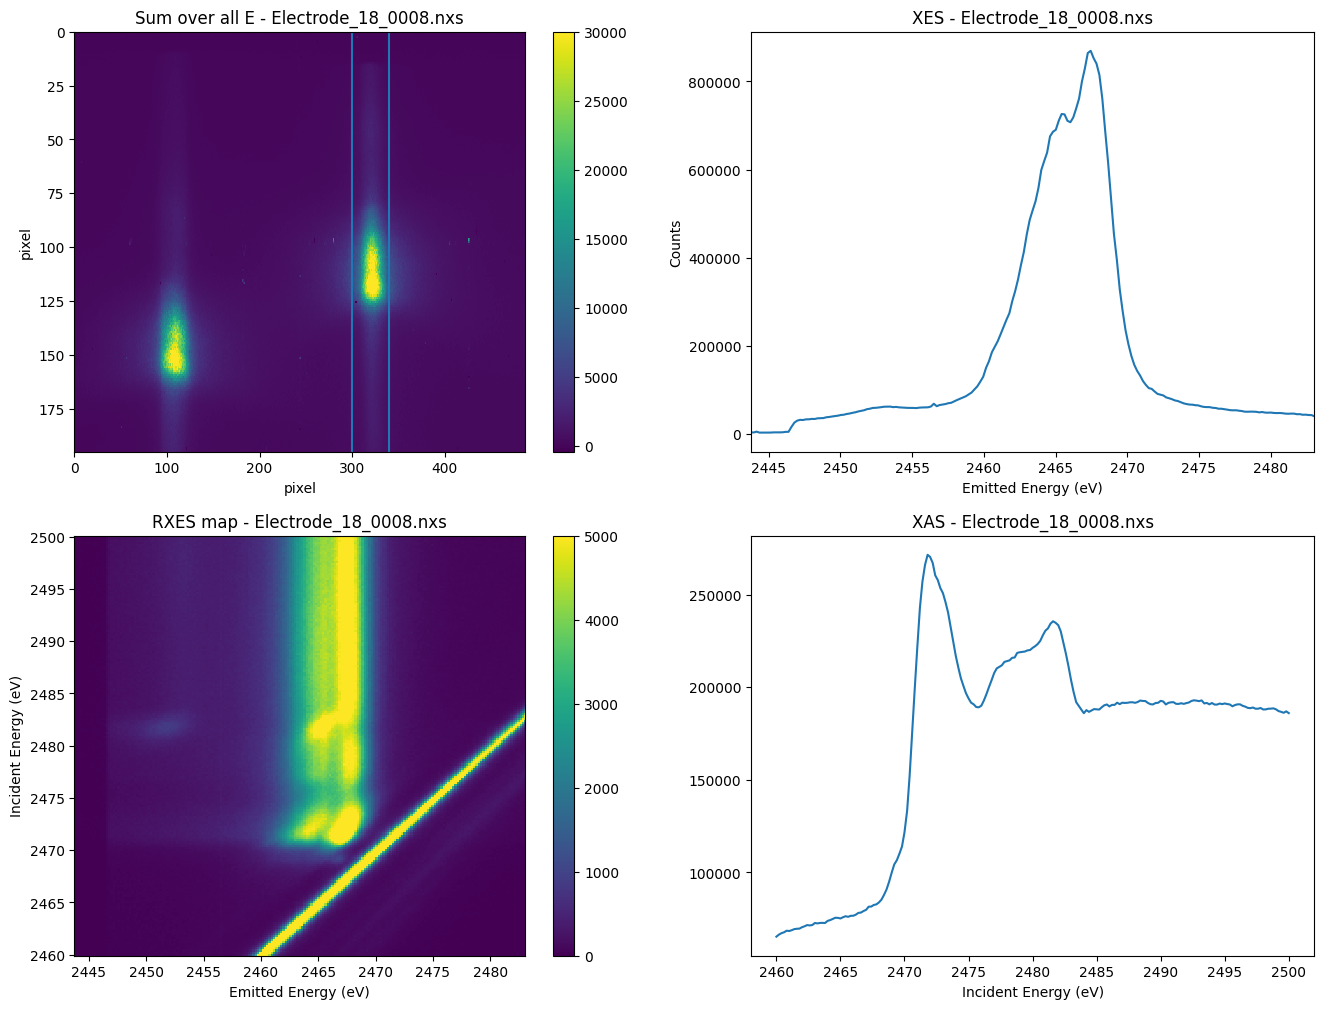

In [141]:
plot_2Dmap('Electrode_18_0008.nxs', pixel_calibration, [300, 340], vmax_sum=30000, vmax_rxes=5000)

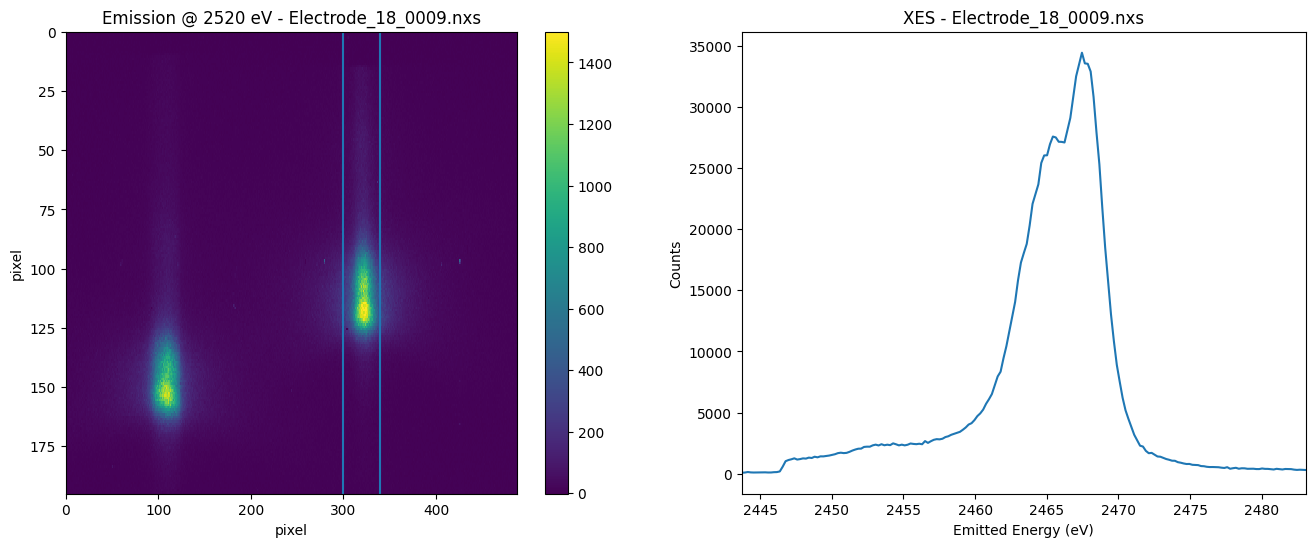

In [154]:
plot_2Dmap('Electrode_18_0009.nxs', pixel_calibration, [300, 340], vmax_sum=1500, vmax_rxes=5000)

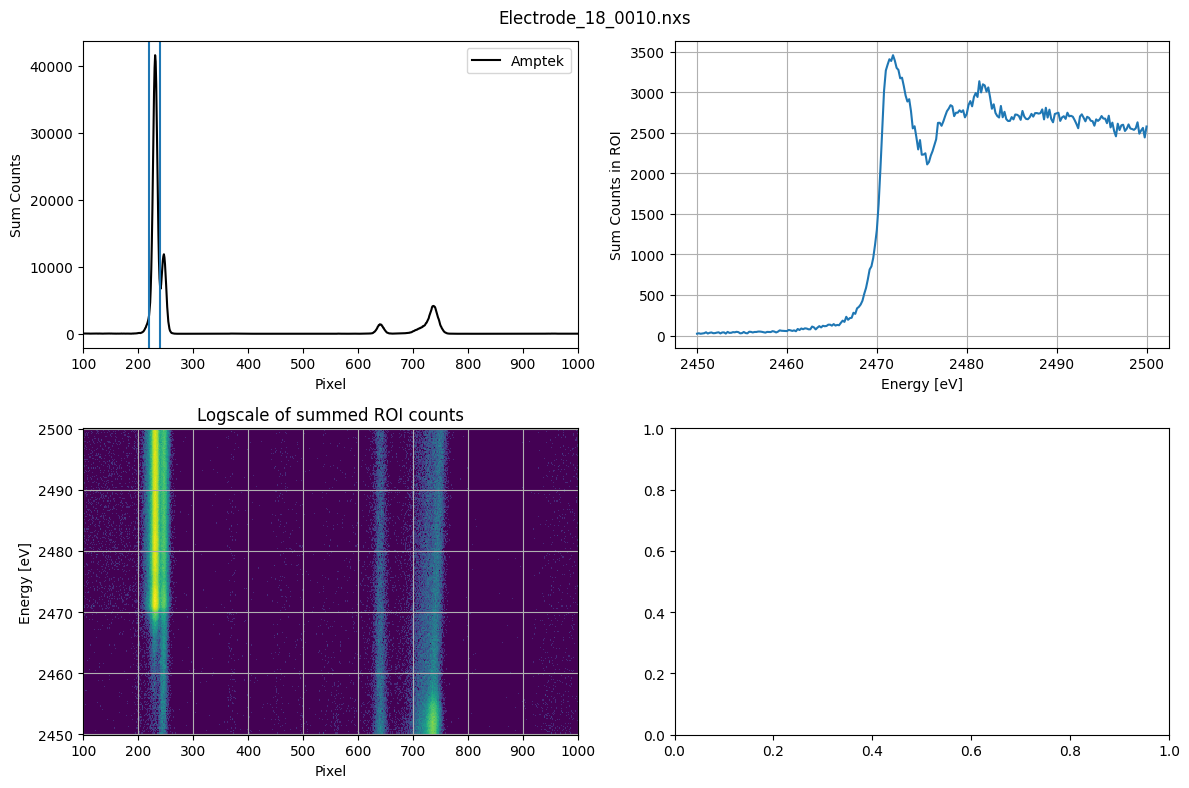

In [155]:
make_sample('Electrode_18_0010.nxs', [[220,240]])

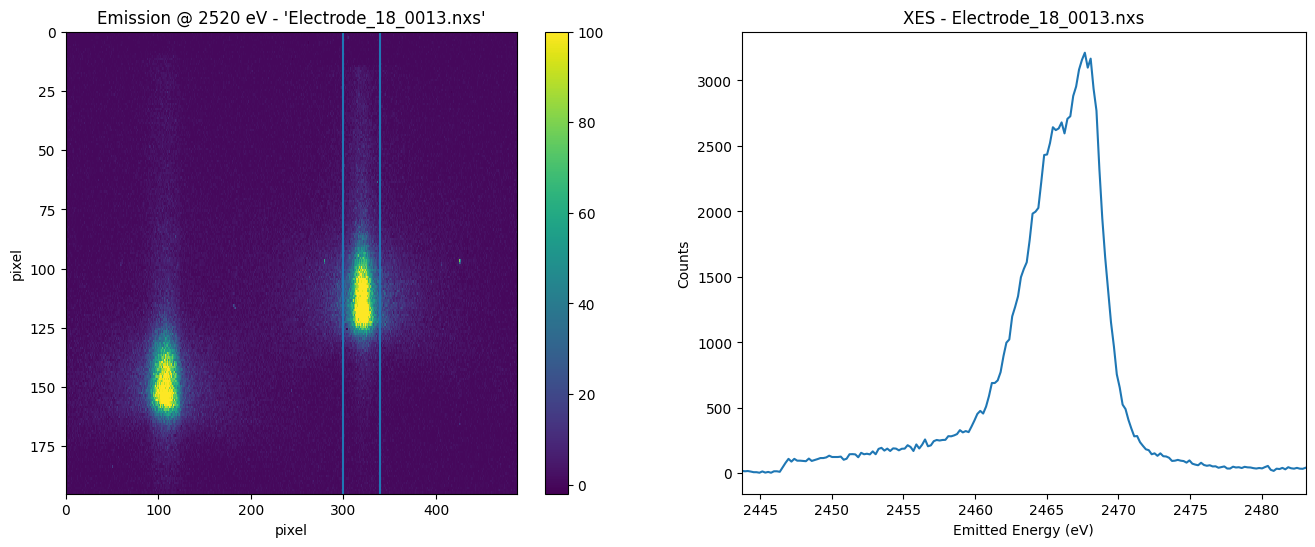

In [160]:
plot_2Dmap('Electrode_18_0013.nxs', pixel_calibration, [300, 340], vmax_sum=100, vmax_rxes=5000)

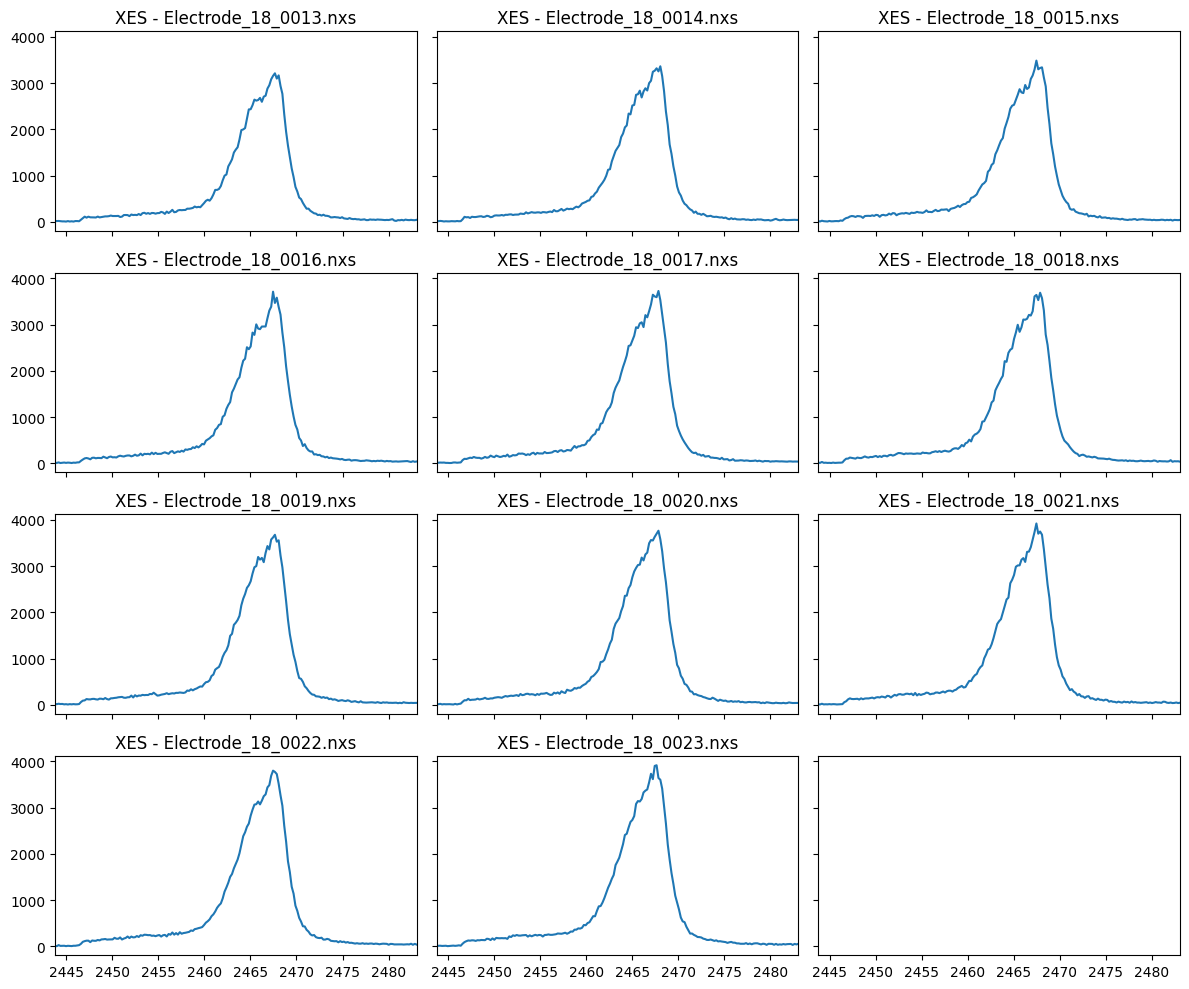

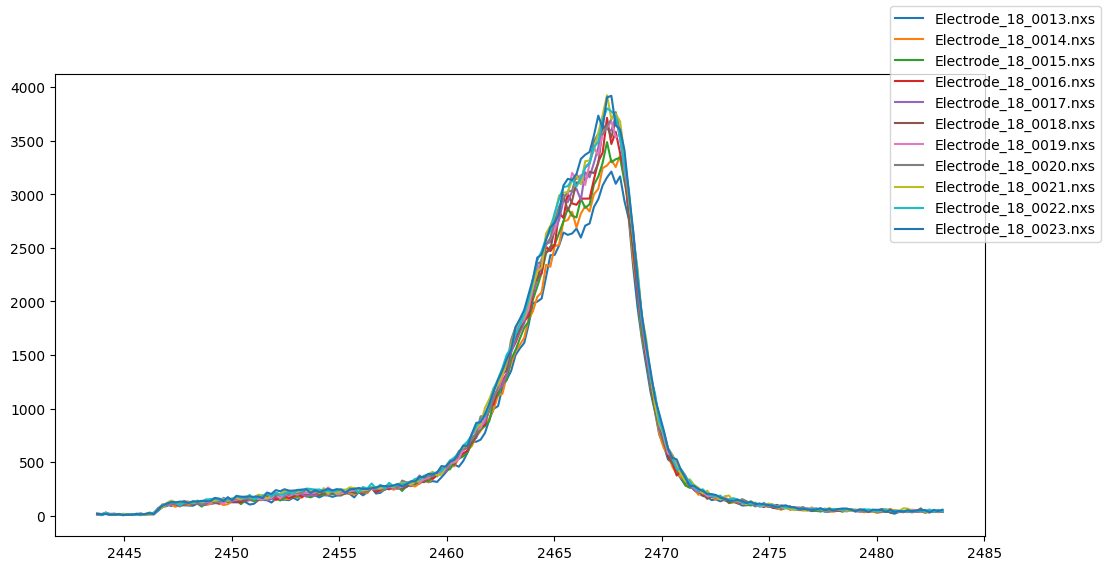

In [175]:
def foo():
    from galaxies import read_nxs_file

    roi = [300, 340]
    E2 = np.polyval(pixel_calibration, np.arange(0, 195))

    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharex=True, sharey=True)
    fig2 = plt.figure(figsize=(12, 6))
    ax2 = fig2.gca()

    for ax, i in zip(axs.flat, range(13, 23+1)):
        filename = f"Electrode_18_{i:04}.nxs"
        data_from_file = read_nxs_file(filename)
        pilatus_image = data_from_file['images']

        ax.set_title('XES - ' + filename)
        ax.plot(E2, np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=(0, 2)))
        # ax.set_xlabel('Emitted Energy (eV)')
        # ax.set_ylabel('Counts')
        ax.set_xlim(min(E2), max(E2))

        ax2.plot(E2, np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=(0, 2)), label=filename)

    fig.tight_layout()
    fig2.legend()

foo()

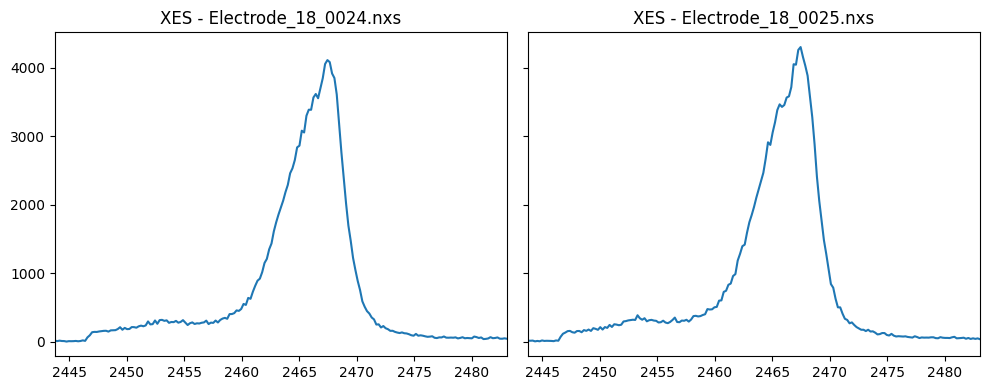

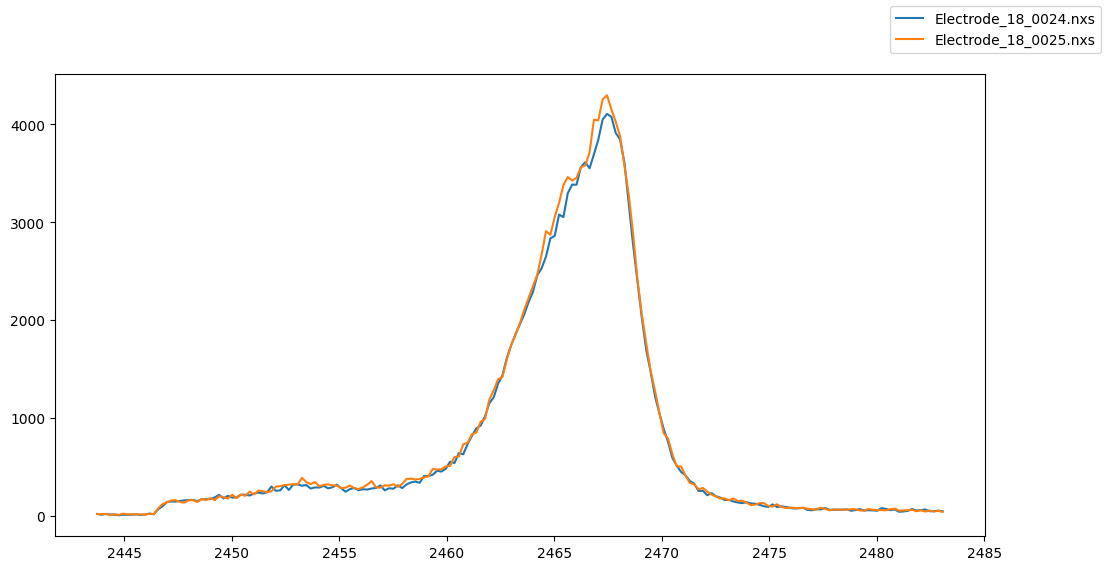

In [181]:
def foo():
    from galaxies import read_nxs_file

    roi = [300, 340]
    E2 = np.polyval(pixel_calibration, np.arange(0, 195))

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
    fig2 = plt.figure(figsize=(12, 6))
    ax2 = fig2.gca()

    for ax, i in zip(axs.flat, range(24, 25+1)):
        filename = f"Electrode_18_{i:04}.nxs"
        data_from_file = read_nxs_file(filename)
        pilatus_image = data_from_file['images']

        ax.set_title('XES - ' + filename)
        ax.plot(E2, np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=(0, 2)))
        # ax.set_xlabel('Emitted Energy (eV)')
        # ax.set_ylabel('Counts')
        ax.set_xlim(min(E2), max(E2))

        ax2.plot(E2, np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=(0, 2)), label=filename)

    fig.tight_layout()
    fig2.legend()

foo()

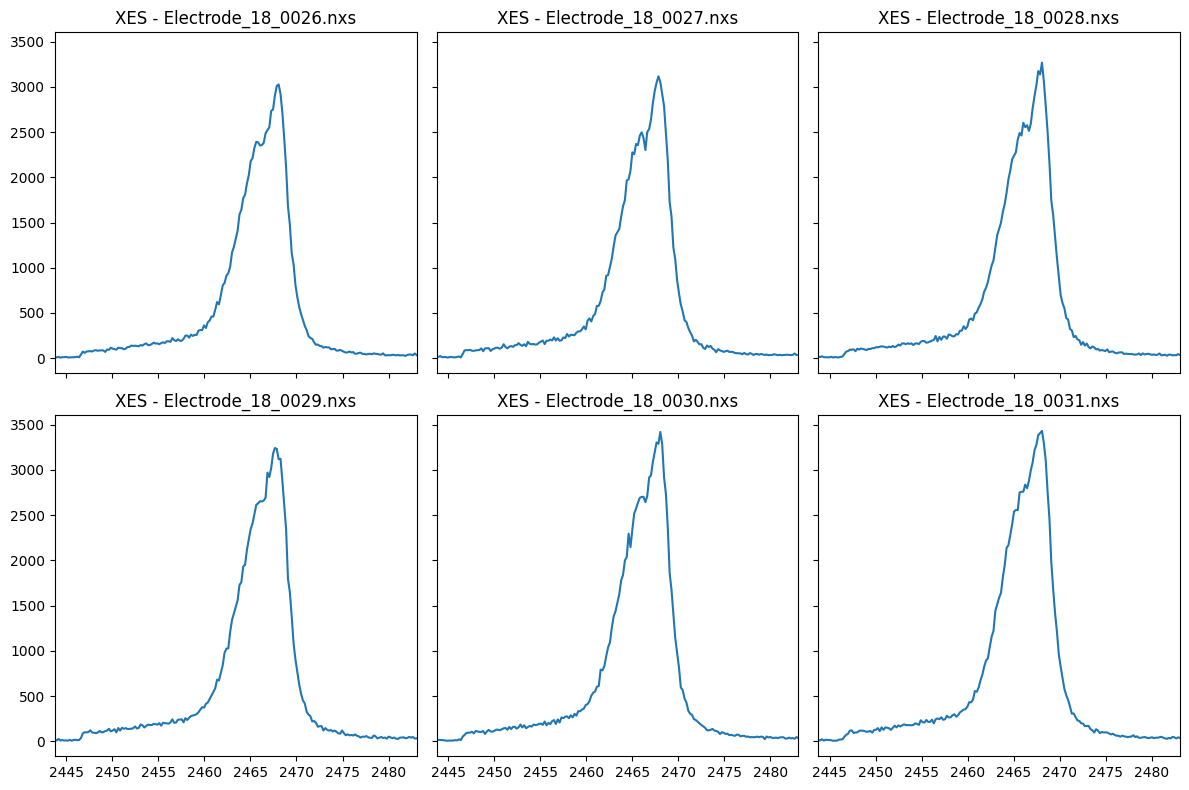

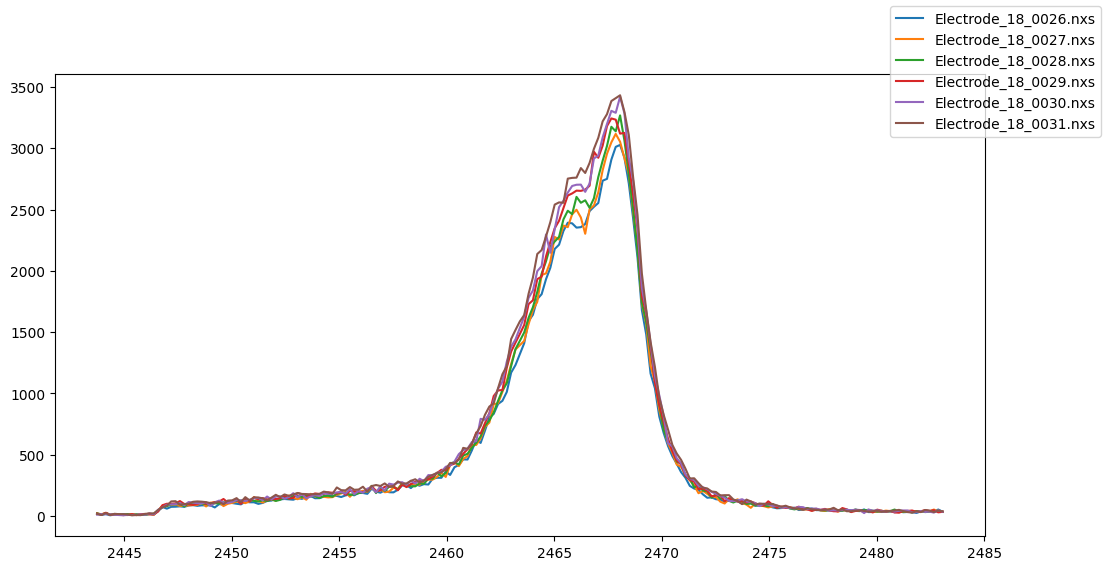

In [179]:
def foo():
    from galaxies import read_nxs_file

    roi = [300, 340]
    E2 = np.polyval(pixel_calibration, np.arange(0, 195))

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)
    fig2 = plt.figure(figsize=(12, 6))
    ax2 = fig2.gca()

    for ax, i in zip(axs.flat, range(26, 31+1)):
        filename = f"Electrode_18_{i:04}.nxs"
        data_from_file = read_nxs_file(filename)
        pilatus_image = data_from_file['images']

        ax.set_title('XES - ' + filename)
        ax.plot(E2, np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=(0, 2)))
        # ax.set_xlabel('Emitted Energy (eV)')
        # ax.set_ylabel('Counts')
        ax.set_xlim(min(E2), max(E2))

        ax2.plot(E2, np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=(0, 2)), label=filename)

    fig.tight_layout()
    fig2.legend()

foo()

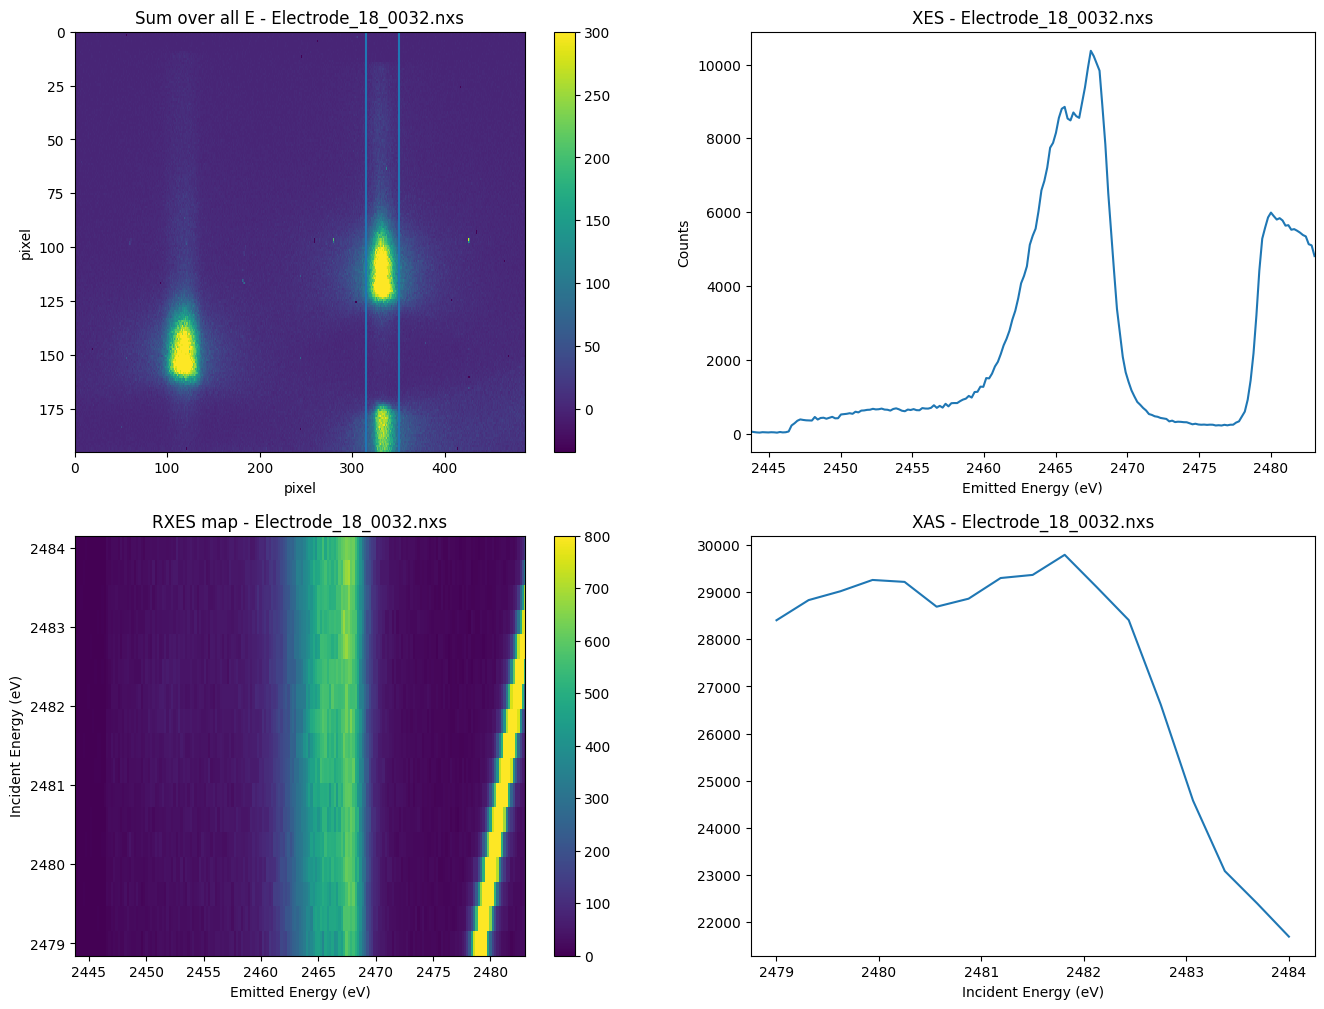

In [190]:
plot_2Dmap('Electrode_18_0032.nxs', pixel_calibration, [315, 350], vmax_sum=300, vmax_rxes=800)

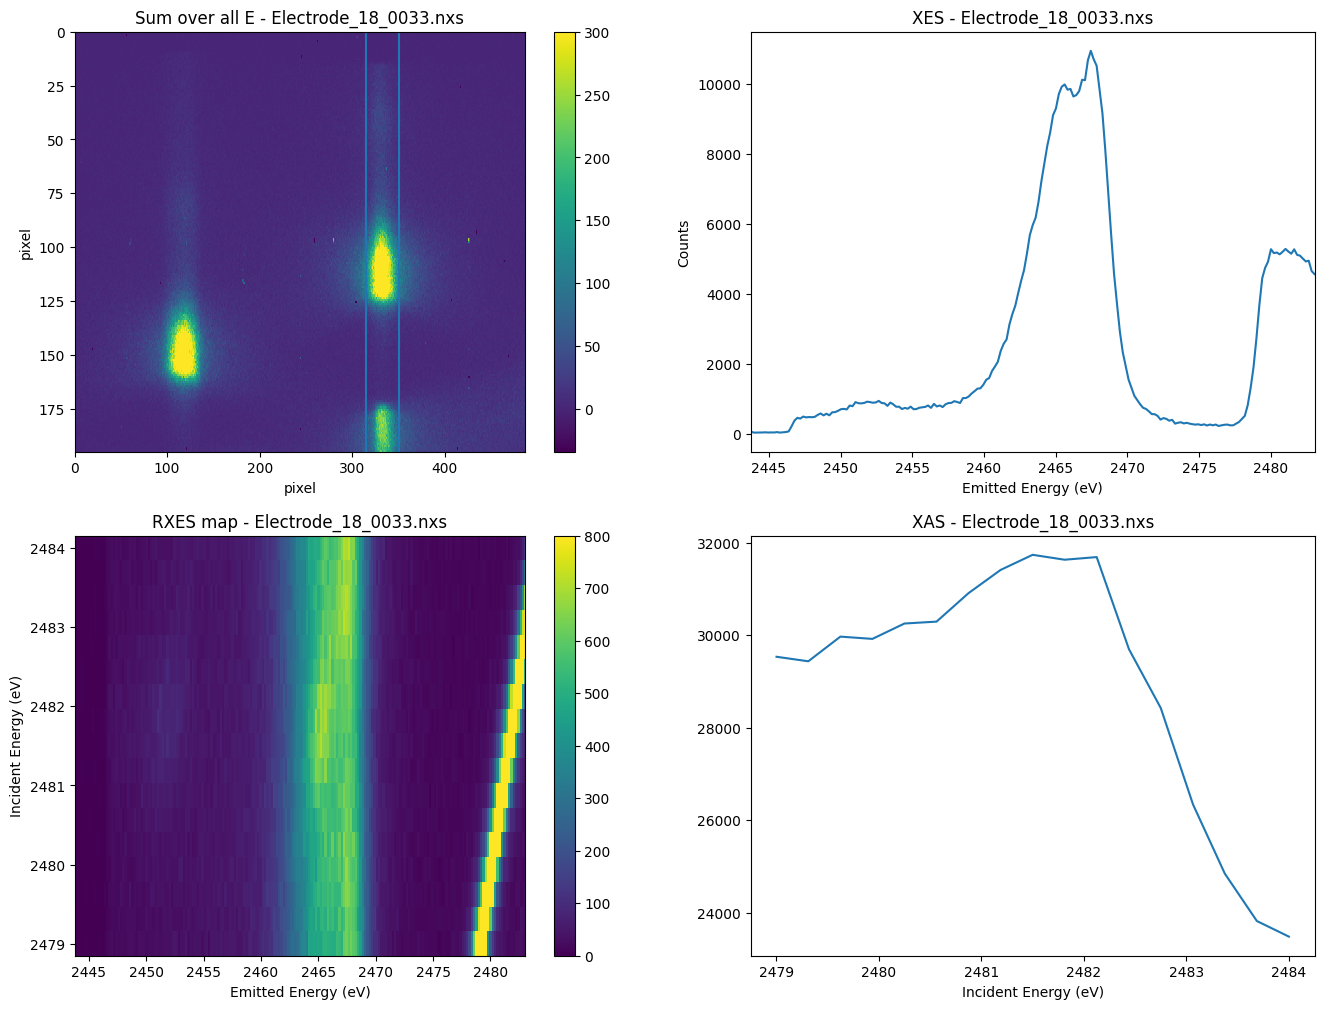

In [191]:
plot_2Dmap('Electrode_18_0033.nxs', pixel_calibration, [315, 350], vmax_sum=300, vmax_rxes=800)

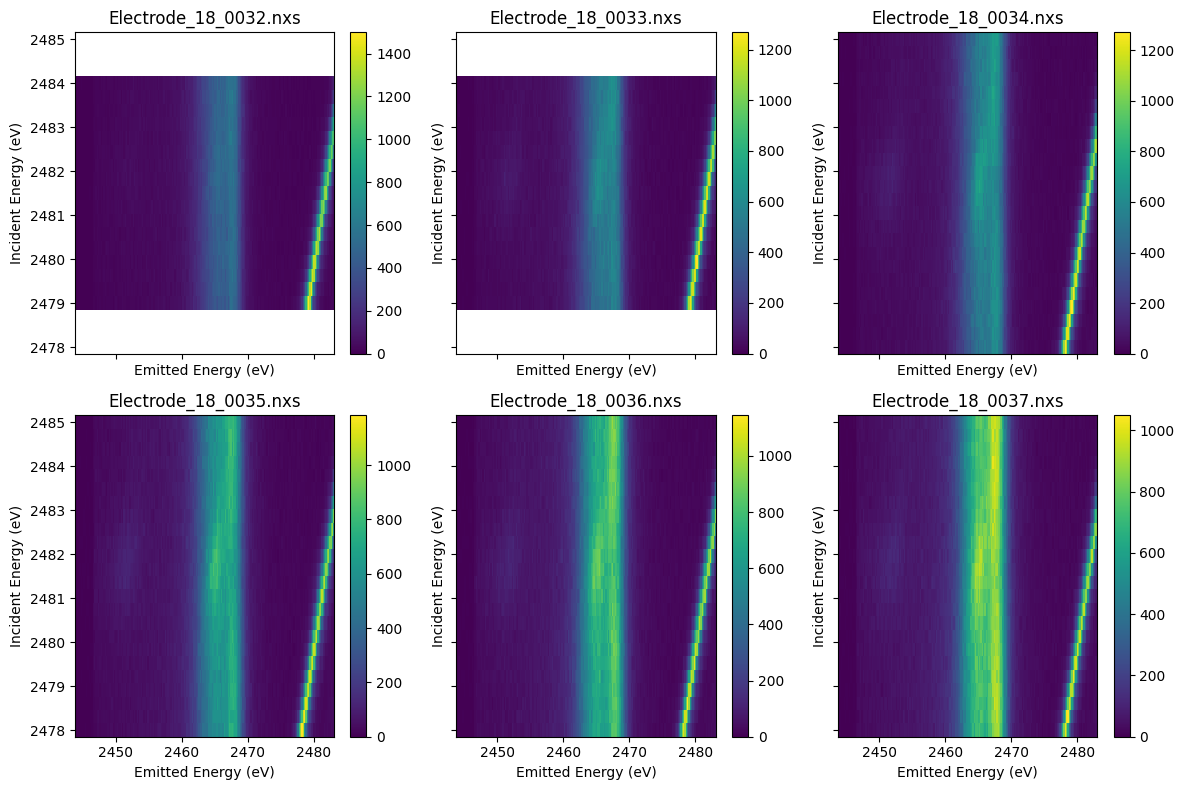

In [193]:
def foo():
    from galaxies import read_nxs_file

    roi = [300, 340]
    E2 = np.polyval(pixel_calibration, np.arange(0, 195))
    spare_energies = np.arange(2,3,1)
    vmax_rxes=None



    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

    for ax, i in zip(axs.flat, range(32, 37+1)):
        filename = f"Electrode_18_{i:04}.nxs"
        data_from_file = read_nxs_file(filename)
        pilatus_image = data_from_file['images']
        energy = data_from_file.get('energies', spare_energies)
        RXES_map = np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=2)

        ax.set_title(filename)
        im = ax.pcolormesh(E2, energy, RXES_map, shading='auto', vmax=vmax_rxes)
        ax.set_xlabel('Emitted Energy (eV)')
        ax.set_ylabel('Incident Energy (eV)')
        fig.colorbar(im, ax=ax)
        ax.set_xlim(min(E2), max(E2))


    fig.tight_layout()

foo()

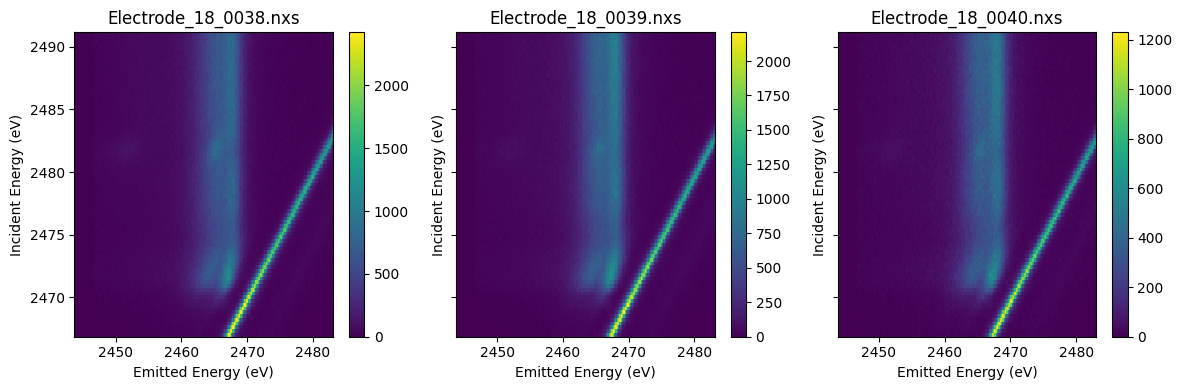

In [196]:
def foo():
    from galaxies import read_nxs_file

    roi = [300, 340]
    E2 = np.polyval(pixel_calibration, np.arange(0, 195))
    spare_energies = np.arange(2,3,1)
    vmax_rxes=None



    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

    for ax, i in zip(axs.flat, range(38, 40+1)):
        filename = f"Electrode_18_{i:04}.nxs"
        data_from_file = read_nxs_file(filename)
        pilatus_image = data_from_file['images']
        energy = data_from_file.get('energies', spare_energies)
        RXES_map = np.sum(pilatus_image[:, :, roi[0]:roi[1]], axis=2)

        ax.set_title(filename)
        im = ax.pcolormesh(E2, energy, RXES_map, shading='auto', vmax=vmax_rxes)
        ax.set_xlabel('Emitted Energy (eV)')
        ax.set_ylabel('Incident Energy (eV)')
        fig.colorbar(im, ax=ax)
        ax.set_xlim(min(E2), max(E2))


    fig.tight_layout()

foo()

# Electrode 19

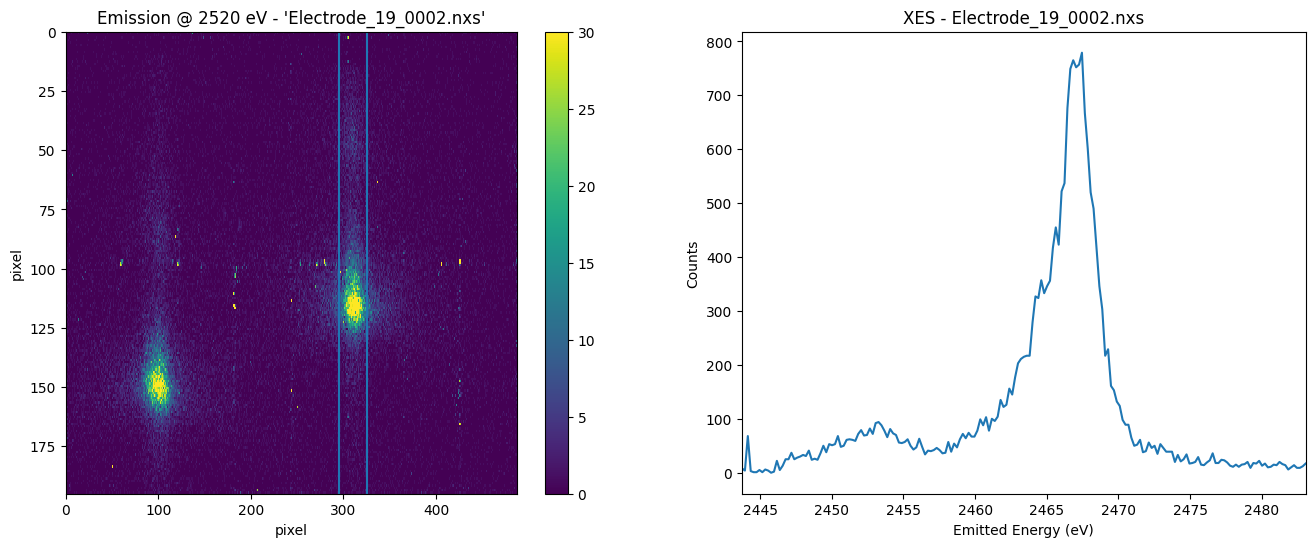

In [45]:
plot_2Dmap('Electrode_19_0002.nxs', pixel_calibration, [295, 325], vmax_sum=30, vmax_rxes=800,
           replace={'energies': [2520]})

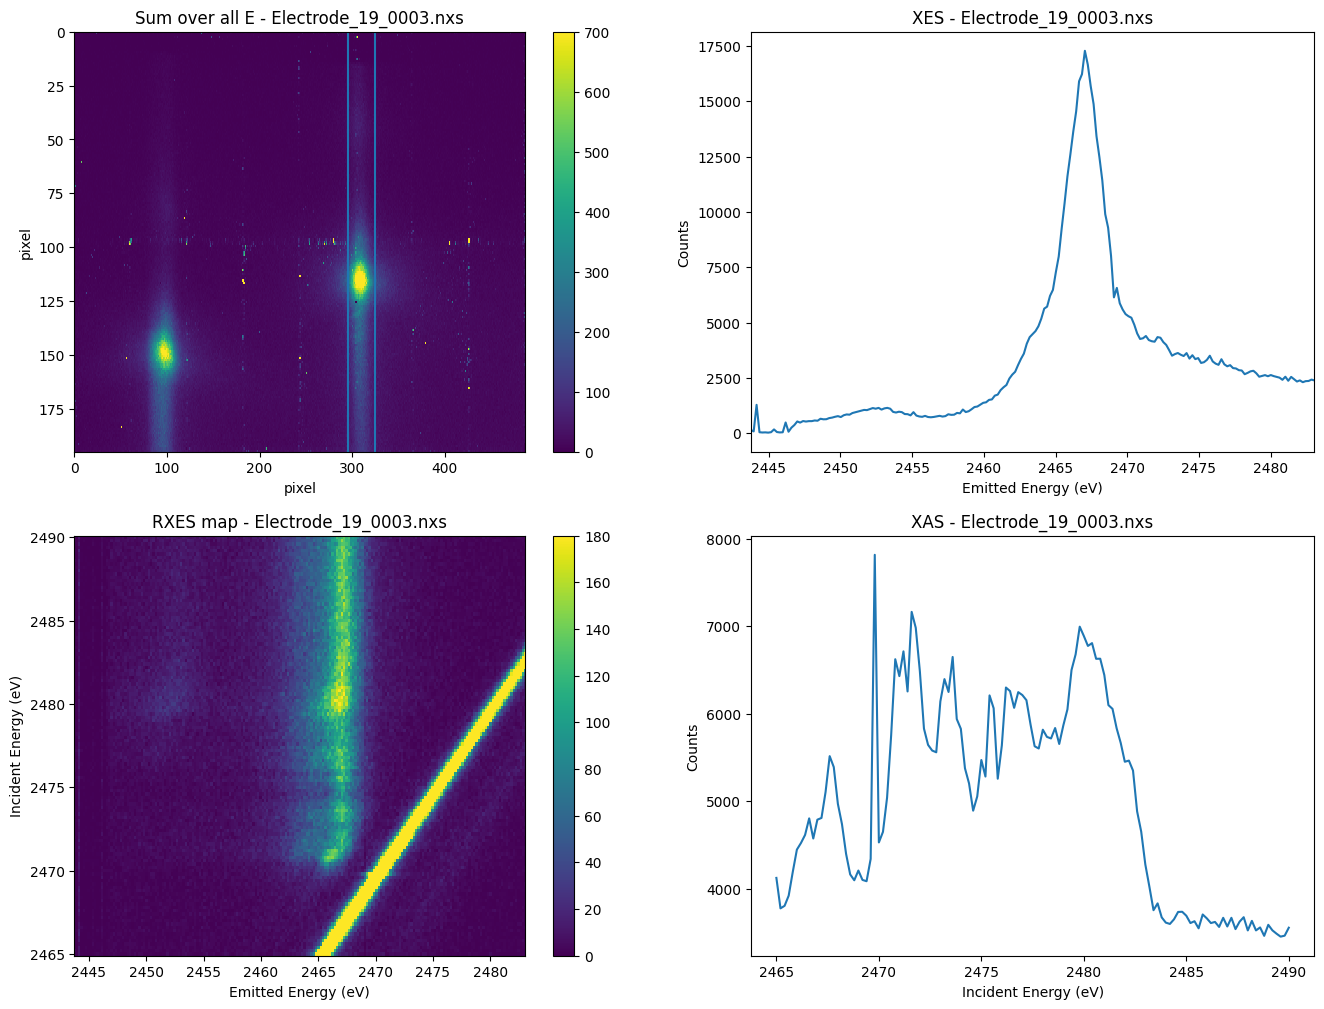

In [44]:
plot_2Dmap('Electrode_19_0003.nxs', pixel_calibration, [295, 325], vmax_sum=700, vmax_rxes=180,
           replace={'energies': np.arange(2465, 2490.1, 0.2)})

# Electrode 20

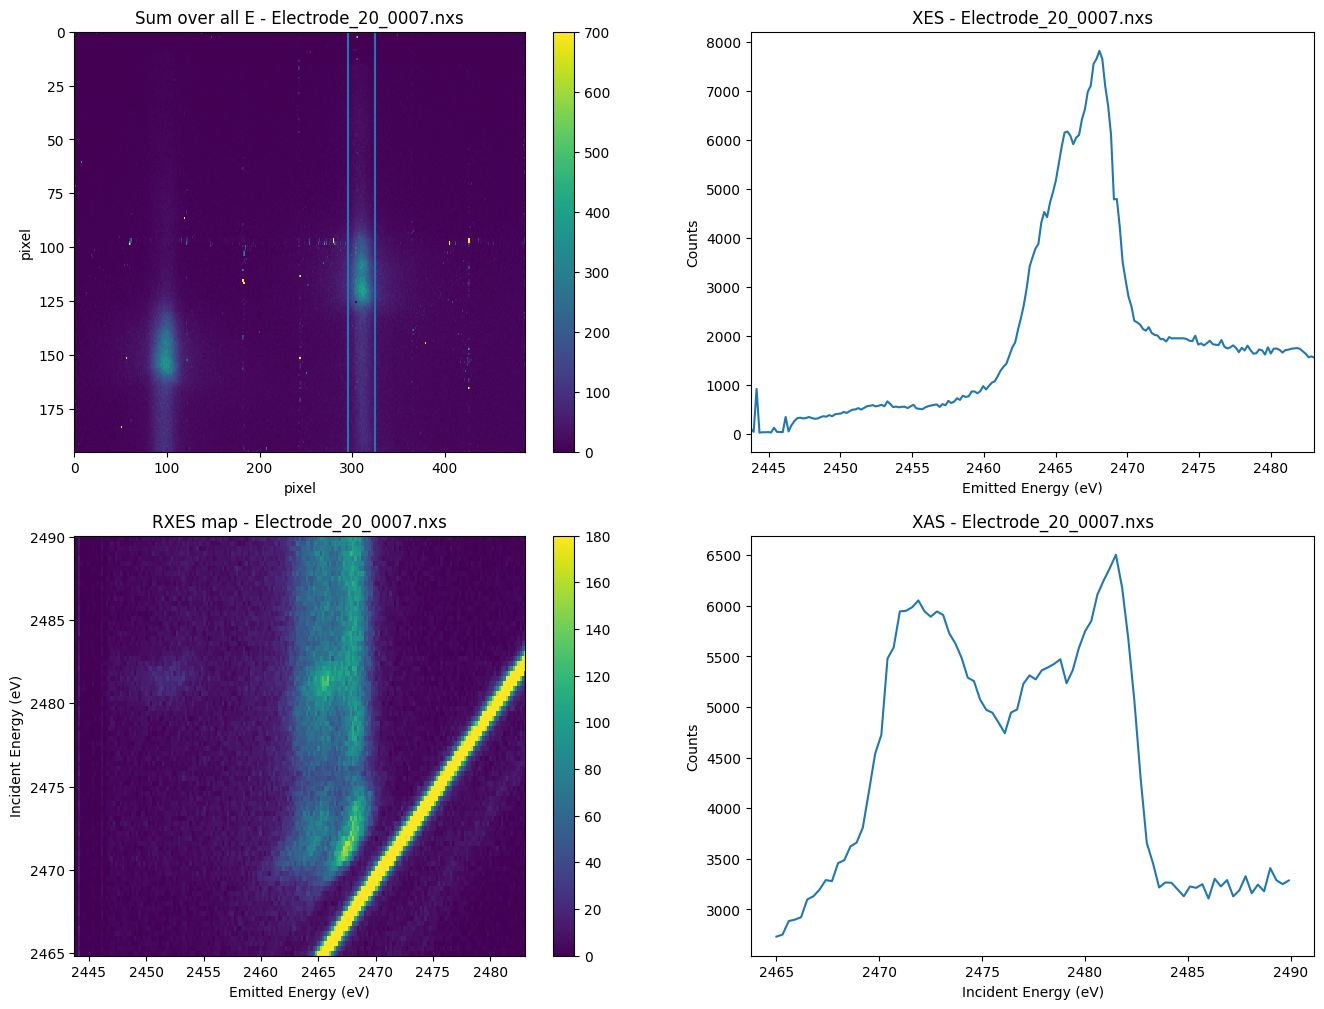

In [46]:
plot_2Dmap('Electrode_20_0007.nxs', pixel_calibration, [295, 325], vmax_sum=700, vmax_rxes=180,
           replace={'energies': np.arange(2465, 2490.1, 0.3)})

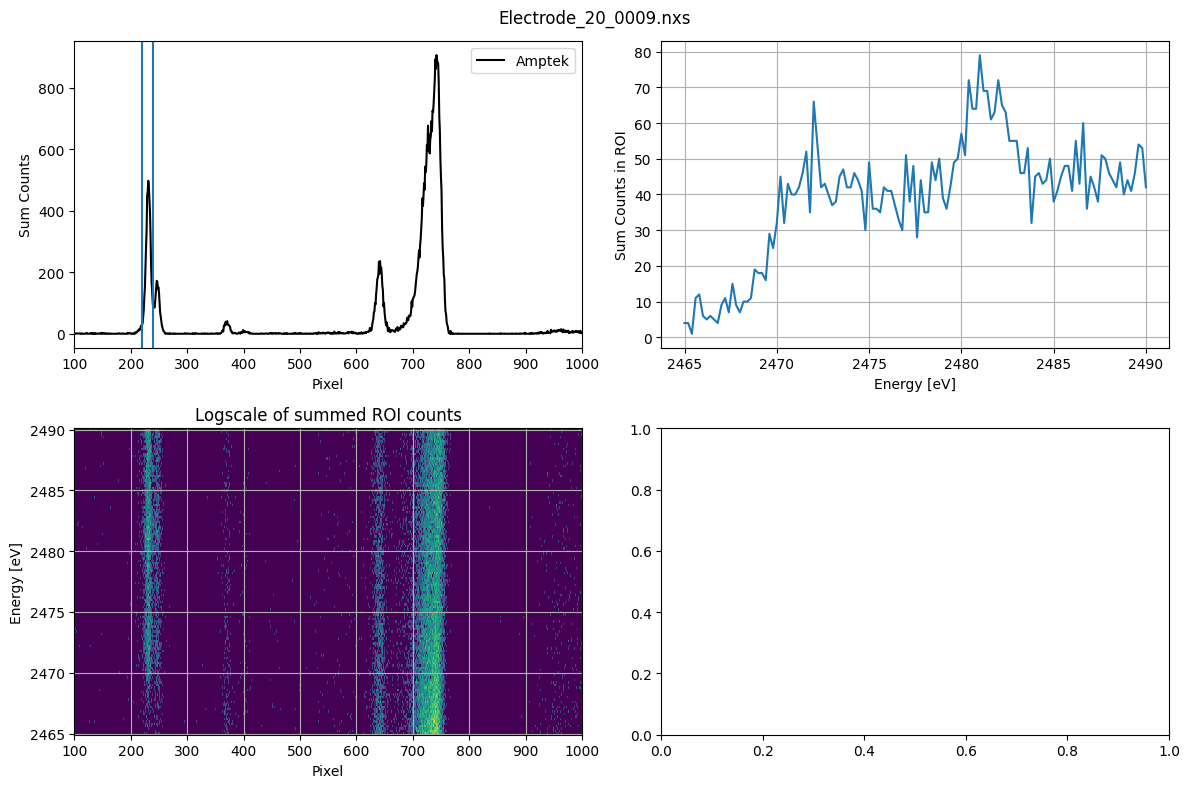

In [48]:
make_sample('Electrode_20_0009.nxs', [[220,240]])